# Çalışan Yıpranma Tahmini Projesi

## Problemin Tanımı ve Amaçlar

Kurumsal şirketlerin en önemli sıkıntılarından birisi de çalışanların şirket bağlılığının ve memnuniyetinin ölçülebilmesidir. Bu bilgiyi kullanarak şirketler çalışanlarına daha iyi bir çalışma ortamı sunabilmek ve çalışan mutluluğunu arttırabilmek için ne tür aksiyonlar almaları gerektiğine karar verebilir.

Aynı zamanda, kişi bazında yapılan analizlerde hangi çalışanların işten ayrılma ihtimalinin olduğu tespit edilebilirse şirket bu çalışanı elinde tutmak için bu kişiye promosyon teklif edebilir, veya bu kişinin yaşadığı sıkıntıları ortadan kaldırabilir.

Bu projedeki amaç, çalışan bilgilerini kullanarak hangi çalışanların yıpranma payının daha fazla olduğunu, dolayısıyla da işten ayrılmaya daha yatkın olabileceğini tespit etmektir. Bunu yaparken çalışan yıpranmasında hangi sebeplerin daha önemli olduğu bilgisini de bulmanız beklenmektedir.

#### Veri

Bu proje için kullanılacak veride toplamda 35 kolon bulunmaktadır.

| Name                       | Description                                                                                                                                                    |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| AGE                        | Numerical Value                                                                                                                                                |
| ATTRITION                  | Employee leaving the company (0=no, 1=yes)                                                                                                                     |
| BUSINESS TRAVEL            | (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)                                                                                                             |
| DAILY RATE                 | Numerical Value - Salary Level                                                                                                                                 |
| DEPARTMENT                 | (1=HR, 2=R&D, 3=Sales)                                                                                                                                         |
| DISTANCE FROM HOME         | Numerical Value - THE DISTANCE FROM WORK TO HOME                                                                                                               |
| EDUCATION                  | Numerical Value                                                                                                                                                |
| EDUCATION FIELD            | (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)                                                                               |
| EMPLOYEE COUNT             | Numerical Value                                                                                                                                                |
| EMPLOYEE NUMBER            | Numerical Value - EMPLOYEE ID                                                                                                                                  |
| ENVIROMENT SATISFACTION    | Numerical Value - SATISFACTION WITH THE ENVIROMENT                                                                                                             |
| GENDER                     | (1=FEMALE, 2=MALE)                                                                                                                                             |
| HOURLY RATE                | Numerical Value - HOURLY SALARY                                                                                                                                |
| JOB INVOLVEMENT            | Numerical Value - JOB INVOLVEMENT                                                                                                                              |
| JOB LEVEL                  | Numerical Value - LEVEL OF JOB                                                                                                                                 |
| JOB ROLE                   | (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE) |
| JOB SATISFACTION           | Numerical Value - SATISFACTION WITH THE JOB                                                                                                                    |
| MARITAL STATUS             | (1=DIVORCED, 2=MARRIED, 3=SINGLE)                                                                                                                              |
| MONTHLY INCOME             | Numerical Value - MONTHLY SALARY                                                                                                                               |
| MONTHY RATE                | Numerical Value - MONTHY RATE                                                                                                                                  |
| NUMCOMPANIES WORKED        | Numerical Value - NO. OF COMPANIES WORKED AT                                                                                                                   |
| OVER 18                    | (1=YES, 2=NO)                                                                                                                                                  |
| OVERTIME                   | (1=NO, 2=YES)                                                                                                                                                  |
| PERCENT SALARY HIKE        | Numerical Value - PERCENTAGE INCREASE IN SALARY                                                                                                                |
| PERFORMANCE RATING         | Numerical Value - ERFORMANCE RATING                                                                                                                            |
| RELATIONS SATISFACTION     | Numerical Value - RELATIONS SATISFACTION                                                                                                                       |
| STANDARD HOURS             | Numerical Value - STANDARD HOURS                                                                                                                               |
| STOCK OPTIONS LEVEL        | Numerical Value - STOCK OPTIONS                                                                                                                                |
| TOTAL WORKING YEARS        | Numerical Value - TOTAL YEARS WORKED                                                                                                                           |
| TRAINING TIMES LAST YEAR   | Numerical Value - HOURS SPENT TRAINING                                                                                                                         |
| WORK LIFE BALANCE          | Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE                                                                                                         |
| YEARS AT COMPANY           | Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY                                                                                                         |
| YEARS IN CURRENT ROLE      | Numerical Value -YEARS IN CURRENT ROLE                                                                                                                         |
| YEARS SINCE LAST PROMOTION | Numerical Value - LAST PROMOTION                                                                                                                               |
| YEARS WITH CURRENT MANAGER | Numerical Value - YEARS SPENT WITH CURRENT MANAGER      

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Kütüphaneler ve Ön Hazırlık

In [1]:
# Gerekli kütüphaneleri import et

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import pickle

from warnings import filterwarnings
filterwarnings("ignore")

### Verinin Yüklenmesi

In [2]:
# veriyi train test verisi olarak yükle

train = pd.read_csv("../BtkAI/data/train.csv")
test = pd.read_csv("../BtkAI/data/test.csv")

In [3]:
train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,4,...,80,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,...,80,1,23,3,3,2,2,2,2,No
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,...,80,1,5,2,3,5,2,0,4,No
3,34,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,...,80,2,8,2,3,8,7,1,7,No
4,23,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Yes


In [4]:
test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,21,Travel_Rarely,1343,Sales,22,1,Technical Degree,1,669,3,...,80,0,3,2,3,3,2,1,2,No
1,24,Travel_Rarely,693,Sales,3,2,Life Sciences,1,720,1,...,80,0,4,3,3,2,2,2,0,Yes
2,42,Travel_Rarely,933,Research & Development,29,3,Life Sciences,1,836,2,...,80,1,10,3,2,9,8,7,8,No
3,46,Travel_Rarely,168,Sales,4,2,Marketing,1,1280,4,...,80,1,26,2,3,11,4,0,8,No
4,35,Travel_Frequently,880,Sales,12,4,Other,1,1667,4,...,80,0,13,2,4,11,9,6,7,Yes


## <hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Ön Analizi

### Veride hangi kolonlar mevcut?

In [5]:
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

### Hangi kolonlar kategorik veriler içeriyor?

In [6]:
train.dtypes[train.dtypes == "object"]

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
Attrition         object
dtype: object

### Kolon Veri Tipleri neler? (numerik, alphanumerik, metin vb.)

In [7]:
train.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

### Hangi kolonda ne kadar null/boş veri mevcut? (Test verisi için de bu bilgi gösterilebilir)

In [8]:
train.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

### Numerik Kolonların İstatistiksel Değerleri

* Toplamda 1176 satır eğitim verisi mevcut.
* En yaşlı çalışan 60 yaşında, en genç çalışan 18 yaşında. Çalışanların çoğu 27, 45 yaş aralığında.
* EmployeeCount kolonunda sadece tek bir değer var.
* MonthlyIncome geniş bir aralığa dağılmış durumda.
* Over18 kolonu gereksiz.

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1176.0,36.859694,9.115610,18.0,30.00,35.0,43.00,60.0
DailyRate,1176.0,804.922619,402.627249,102.0,466.75,802.0,1163.25,1499.0
DistanceFromHome,1176.0,9.329082,8.109130,1.0,2.00,7.0,14.00,29.0
Education,1176.0,2.897959,1.030495,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1176.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1176.0,1024.346939,606.582338,2.0,490.25,1012.5,1570.25,2065.0
EnvironmentSatisfaction,1176.0,2.724490,1.093398,1.0,2.00,3.0,4.00,4.0
HourlyRate,1176.0,65.544218,20.202669,30.0,48.00,65.0,83.00,100.0
JobInvolvement,1176.0,2.714286,0.718154,1.0,2.00,3.0,3.00,4.0
JobLevel,1176.0,2.058673,1.094260,1.0,1.00,2.0,3.00,5.0


### Kategorik kolonların İstatistiksel Değerleri

In [10]:
train.describe(include=['O']).T

,count,unique,top,freq
BusinessTravel,1176,3,Travel_Rarely,841
Department,1176,3,Research & Development,764
EducationField,1176,6,Life Sciences,482
Gender,1176,2,Male,711
JobRole,1176,9,Sales Executive,265
MaritalStatus,1176,3,Married,543
Over18,1176,1,Y,1176
OverTime,1176,2,No,837
Attrition,1176,2,No,987


In [11]:
cat_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]

for feature in cat_features:
    print()
    print(feature)
    print(train[feature].value_counts())
print()


BusinessTravel
Travel_Rarely        841
Travel_Frequently    217
Non-Travel           118
Name: BusinessTravel, dtype: int64

Department
Research & Development    764
Sales                     363
Human Resources            49
Name: Department, dtype: int64

EducationField
Life Sciences       482
Medical             365
Marketing           127
Technical Degree    111
Other                69
Human Resources      22
Name: EducationField, dtype: int64

Gender
Male      711
Female    465
Name: Gender, dtype: int64

JobRole
Sales Executive              265
Research Scientist           229
Laboratory Technician        211
Manufacturing Director       114
Healthcare Representative    102
Manager                       79
Sales Representative          68
Research Director             67
Human Resources               41
Name: JobRole, dtype: int64

MaritalStatus
Married     543
Single      369
Divorced    264
Name: MaritalStatus, dtype: int64

Over18
Y    1176
Name: Over18, dtype: int64

OverTi

### Varsayımlar

In [12]:
train.head(2).T

,0,1
Age,30,48
BusinessTravel,Travel_Rarely,Travel_Frequently
DailyRate,911,365
Department,Research & Development,Research & Development
DistanceFromHome,1,4
Education,2,5
EducationField,Medical,Medical
EmployeeCount,1,1
EmployeeNumber,1989,1644
EnvironmentSatisfaction,4,3


Yaptığınız ilk gözlemler sonucunda yaptığınız varsayımları açıklayın.

#### Eksik Verilerin Tamamlanması

##### Hangi kolonlardaki veriler tamamlanabilir?

* Eksik veri yok

#### Verilerin Düzeltilmesi

##### Hangi kolonlardaki veriler ne tür düzeltmelere ihtiyaç duyabilir?

* BusinessTravel, Departmant, EducationField ve MaritalStatus metin olarak verilmiş, nümerik format olması gerekir
* Over18 kaldırılacak
* EmployeeCount Silinecek
* EmployeeNumber silinecek
* StandartHours Kaldırılacak

#### Yeni Özniteliklerin Yaratılması

##### Bazı kolonları farklı şekillerde birleştirerek veya kolon değerlerini belirli işlemlerden geçirerek yeni öznitelikler yaratılabilir mi?

* Çalışma sahasına göre cinsiyet önemli midir?
* Fazla mesai ile maaş arasındaki ilişki önemli midir? (Hayır)
* Yaşına ve cinsiyetine göre gezmesi önemli midir? (Hayır)
* Yaşa göre JobSatisfaction önemli midir?
* Yaş, cinsiyet ve maaş arasında bir ilişki var mıdır? (Hayır)
* Evlilik ve Overtime arasında bir ilişki var mıdır?
* Evden uzaklık ile evilik arasındabir ilişki var mıdır? (Hayır)
* Kişinin meslektaşlarına göre maaşlarının seviyesi
* Training ile Yaş arasında bir ilişki var mıdır?
* Çalıştığı şirket sayısı ile tecrübe arasında bir ilişki var mıdır?
* Çalıştığı yıla göre JobLevel arasında bir ilişki var mıdır?

#### Sınıflandırıcı Veriler

##### Veri içerisinde model eğitimine katkı sağlayabilecek ne tür alt gruplar olabilir?

* Yaşı yüksek kişiler yıpranmaya daha açık olabilir.
* Yaşı yüksek kişiler, evli kişiler iş seyahatlerinden daha fazla yıpranıyor olabilir.
* Evli kişiler işten ayrılmaya daha az istekli olabilir.
* Evli kişiler için work life balance daha önemli olabilir.
* Genç çalışanlar için training programları daha önemli olabilir.

#### İlişkili Veriler

##### Veri içerisinde model eğitimine katkı sağlayabilecek ne tür ilişkiler olabilir?

* Hourly, daily, monthly rate ile income arasındaki ilişki incelenebilir.

#### Ek Gözlemler/Varsayımlar

-

## <hr style="height:0.5px;border-width:0;color:black;background-color:black">

## Veri Analizi ve Görselleştirmeleri

### Univariate Analysis

In [13]:
cat_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]
numeric_features = list(set(train.columns) - set(cat_features))
numeric_features

['Education',
 'TrainingTimesLastYear',
 'TotalWorkingYears',
 'Age',
 'YearsInCurrentRole',
 'PercentSalaryHike',
 'YearsSinceLastPromotion',
 'HourlyRate',
 'EmployeeNumber',
 'DailyRate',
 'YearsWithCurrManager',
 'StandardHours',
 'DistanceFromHome',
 'EmployeeCount',
 'JobLevel',
 'RelationshipSatisfaction',
 'EnvironmentSatisfaction',
 'StockOptionLevel',
 'JobInvolvement',
 'MonthlyRate',
 'WorkLifeBalance',
 'YearsAtCompany',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'JobSatisfaction',
 'PerformanceRating']

In [14]:
len(numeric_features)

26

In [15]:
train.dtypes[train.dtypes == 'O']

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
Attrition         object
dtype: object

#### Kagetorik Kolonların Değer Dağılımlarının Görselleştirilmesi

In [16]:
# ?sns.countplot

##### Business Travel

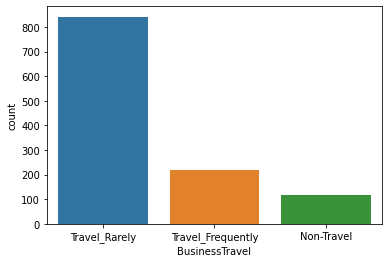

In [17]:
sns.countplot(x="BusinessTravel", data=train);

Business Travel Imbalanced

**Yorumlar**

-

##### Department

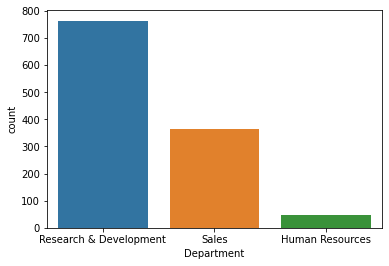

In [18]:
sns.countplot(x="Department", data=train);

**Yorumlar**

-

##### EducationField

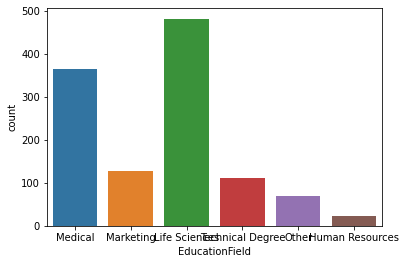

In [19]:
sns.countplot(data=train, x = "EducationField");

**Yorumlar**

-

##### Over18

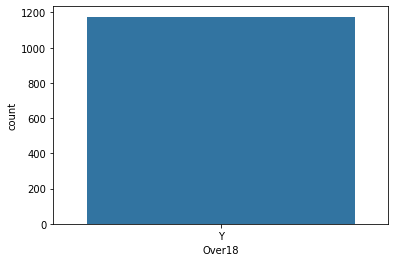

In [20]:
sns.countplot(x="Over18", data=train);

**Yorumlar**

-

##### Age

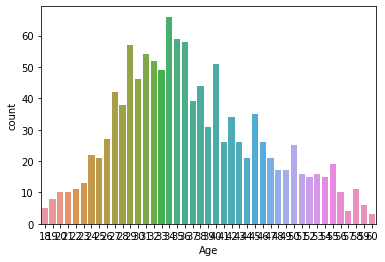

In [21]:
sns.countplot(x="Age", data=train);

**Yorumlar**

-

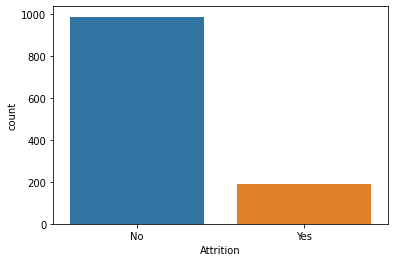

In [22]:
sns.countplot(train["Attrition"]);

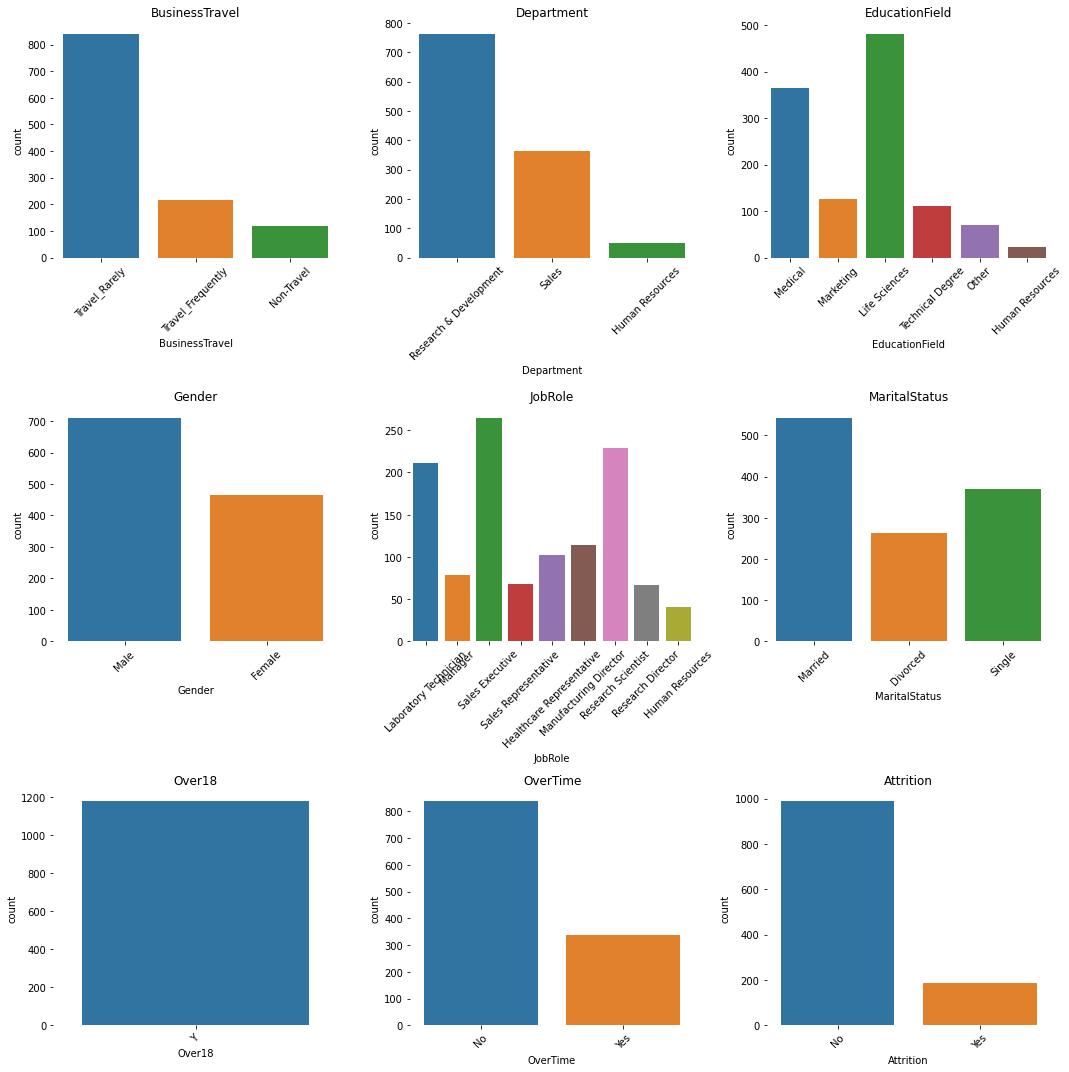

In [23]:
num_rows = 3
num_cols = 3
fig, ax = plt.subplots(num_cols, num_rows, figsize=(15, 15))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(cat_features):
        feature = cat_features[i]
        plot = sns.countplot(x=feature, data=train, ax=ax[row,col])
        plot.set_title(feature)
        plot.set_xticklabels(plot.get_xticklabels(),rotation = 45)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

* İşten ayrılan kişi sayısında dengesizlik mevcut. Başarım metrikleri buna göre düzenlenmeli.
* Çoğu çalışan nadiren iş gezisine çıkıyor. Eğer bir korelasyon bulunmazsa nadiren iş gezisine çıkanlar non-travel ile birleştirilebilir.
* Human resources departmanında çalışan çok az kişi var.
* Çalışanların çoğu medical ve Life Sciences eğitimine sahip.
* Kadın erkek çalışanları arasında ciddi bir dengesizlik bulunmamakta.
* Over18 kolonu gereksiz.
* Çalışanların çoğu OverTime çalışmıyor. Overtime çalışmakla yıpranma arasında bir ilişki olabilir.

#### Numerik Kolonların Değer Dağılımlarının Görselleştirilmesi

In [24]:
train.dtypes[train.dtypes == "int64"]

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [25]:
# ?sns.histplot

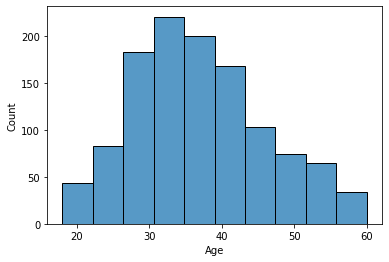

In [26]:
sns.histplot(x="Age", stat="count", data=train, bins = 10);

**Yorumlar**

Çalışanlar genel olarak 25-45 yaş arasındadır

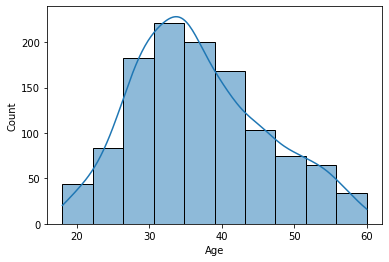

In [27]:
sns.histplot(x="Age", stat="count", data=train, bins = 10, kde=True);
# KDE = Kernel density estimate

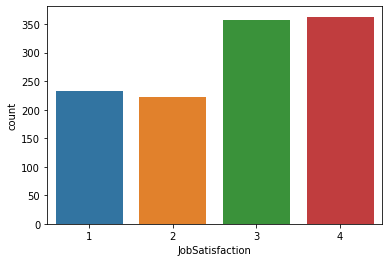

In [28]:
sns.countplot(data=train, x="JobSatisfaction");

**Yorumlar**

Çalışanlar genel olarak işinden memnundur

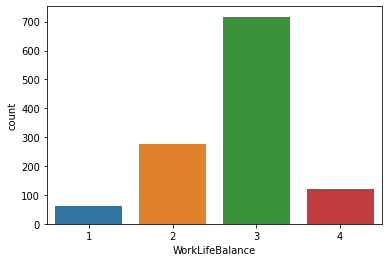

In [29]:
sns.countplot(data=train, x="WorkLifeBalance");

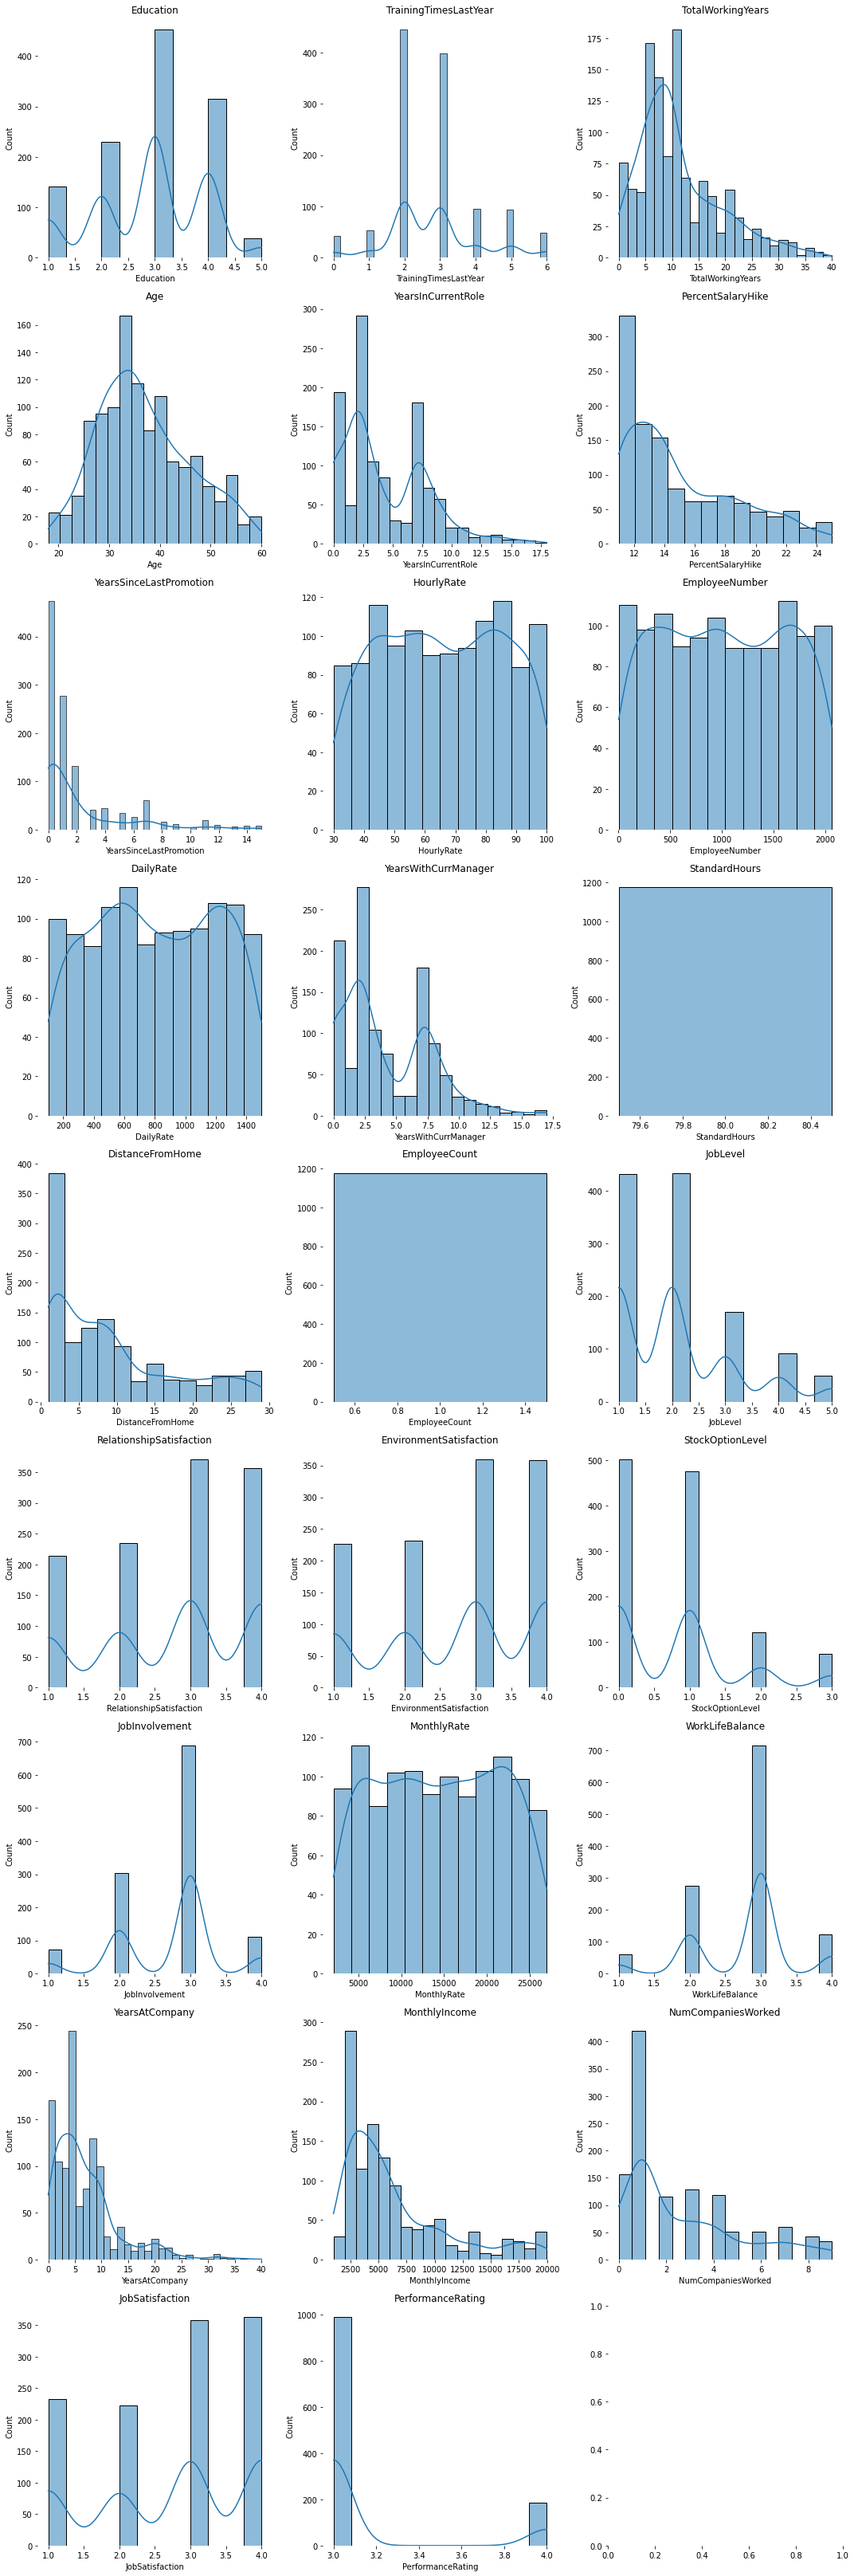

In [30]:
num_rows = 9
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 45))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(numeric_features):
        feature = numeric_features[i]
        plot = sns.histplot(x=feature, data=train, ax=ax[row,col], kde=True)
        plot.set_title(feature)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

* Standard Hours ve EmployeeCount kaldırılmalı.
* Years at Company 7 yıl civarında yığılmış durumda. 0-5, 5-10, 10> şeklinde üç kategoriye indirgenebilir.
* Yaş dağılımı normal dağılıma benzer görünüyor.
* Job ve relation satisfaction kolonlarında 1,2 seçenekleriyle 3,4 seçenekleri arasında benzer bir ayrım var. Aralarında bir korelasyon olabilir.
* Çalışanların yarısından azının stock option'u bulunmamakta. Eğer 2, 3 olmasıyla alakalı bir korelasyon yoksa stok var - stok yok şekline indirgenebilir.
* Çalışanlar arasında aylık gelir dengesizliği var. Çalışan seviyesine kıyasla düşül-orta-yüksek şeklinde üç kategorili yeni  bir kolon yaratılabilir.
* Mevcut rolde çalışma kolonunda 5 yıl civarında keskin bir ayrım mevcut. <5 >5 şeklinde binary yeni bir kolon yaratılabilir. 
* Çoğu çalışan kısa süre içerisinde terfi almış. Yakın zamanda terfi aldı-almadı şeklinde bir kolon yaratılabilir.
* Bazı çalışanlar diğerlerinden daha fazla zam almış durumda. 
* Şu anda ilk şirketinde çalışmakta olan çok fazla çalışan var. İlk şirketi veya değil şeklinde yeni bir kolon yaratılabilir.
* 5 yıldan fazladır mevcut yöneticiyle veya değil şeklinde bir kolon yaratılabilir.
* Çoğu çalışana iş yeri oldukça yakın. Yakın-orta-uzak şeklinde bir kolon yaratılabilir.
* Toplam çalışma yılında 10 yıl civarı bir yığılma mevcut. Bu veri de kategorik hale getirilebilir. 

### Bivariate Analysis

#### Kategorik Kolonlar ile Hedef Arasındaki İlişkilerin Görselleştirilmesi

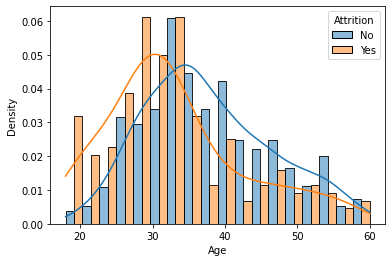

In [31]:
sns.histplot(x="Age", data=train, kde=True,common_norm = False,stat="density",multiple="dodge", hue ="Attrition");

**Yorumlar**

İşten ayrılanlar genelde 25-35 yaş arasındadır

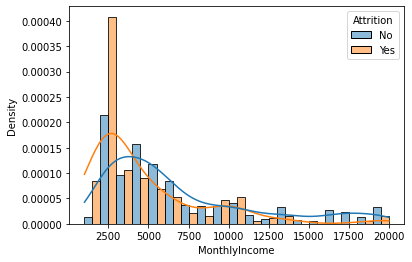

In [32]:
sns.histplot(x="MonthlyIncome", data=train, kde=True,common_norm = False,stat="density",multiple="dodge", hue ="Attrition");

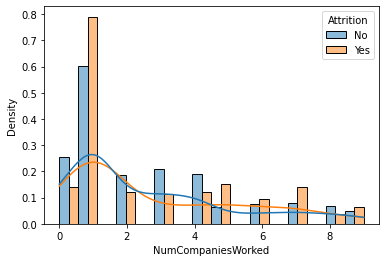

In [33]:
sns.histplot(x="NumCompaniesWorked", data=train, kde=True,common_norm = False,stat="density",multiple="dodge", hue ="Attrition");

**Yorumlar**

İşten ayrılanlar genelde daha önceden 1 şirkette çalışmıştır

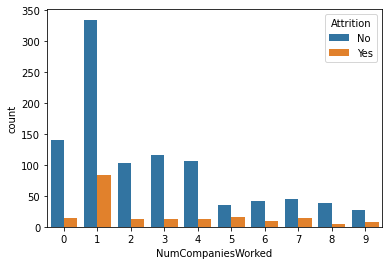

In [34]:
sns.countplot(x="NumCompaniesWorked", data=train, hue ="Attrition");

In [35]:
# ?sns.kdeplot

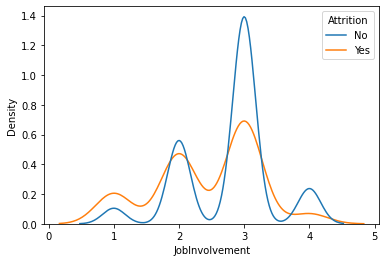

In [36]:
sns.kdeplot(x="JobInvolvement", data=train, hue ="Attrition", common_norm = False);

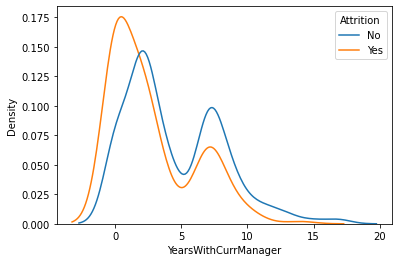

In [37]:
sns.kdeplot(data=train, x="YearsWithCurrManager", hue ="Attrition", common_norm = False);

#### Yorumlar

* Cinsiyetin attrition üzerinde doğrudan bir korelasyonu olmayabilir.
* Satış departmanındaki attrition oranı diğer departmanlara oranla daha yüksek gibi duruyor.
* JobRole kolonunun değerlerinin dağılımı attrition'a göre farklılık gösteriyor. Bir korelasyon olabilir.
* Bekarlık ile Attrition arasında bir ilişki olabilir.
* OverTime kolonuyla Attrition arasında bariz bir korelasyon mevcut.

#### Numerik Kolonlar ile Hedef Arasındaki İlişkilerin Görselleştirilmesi

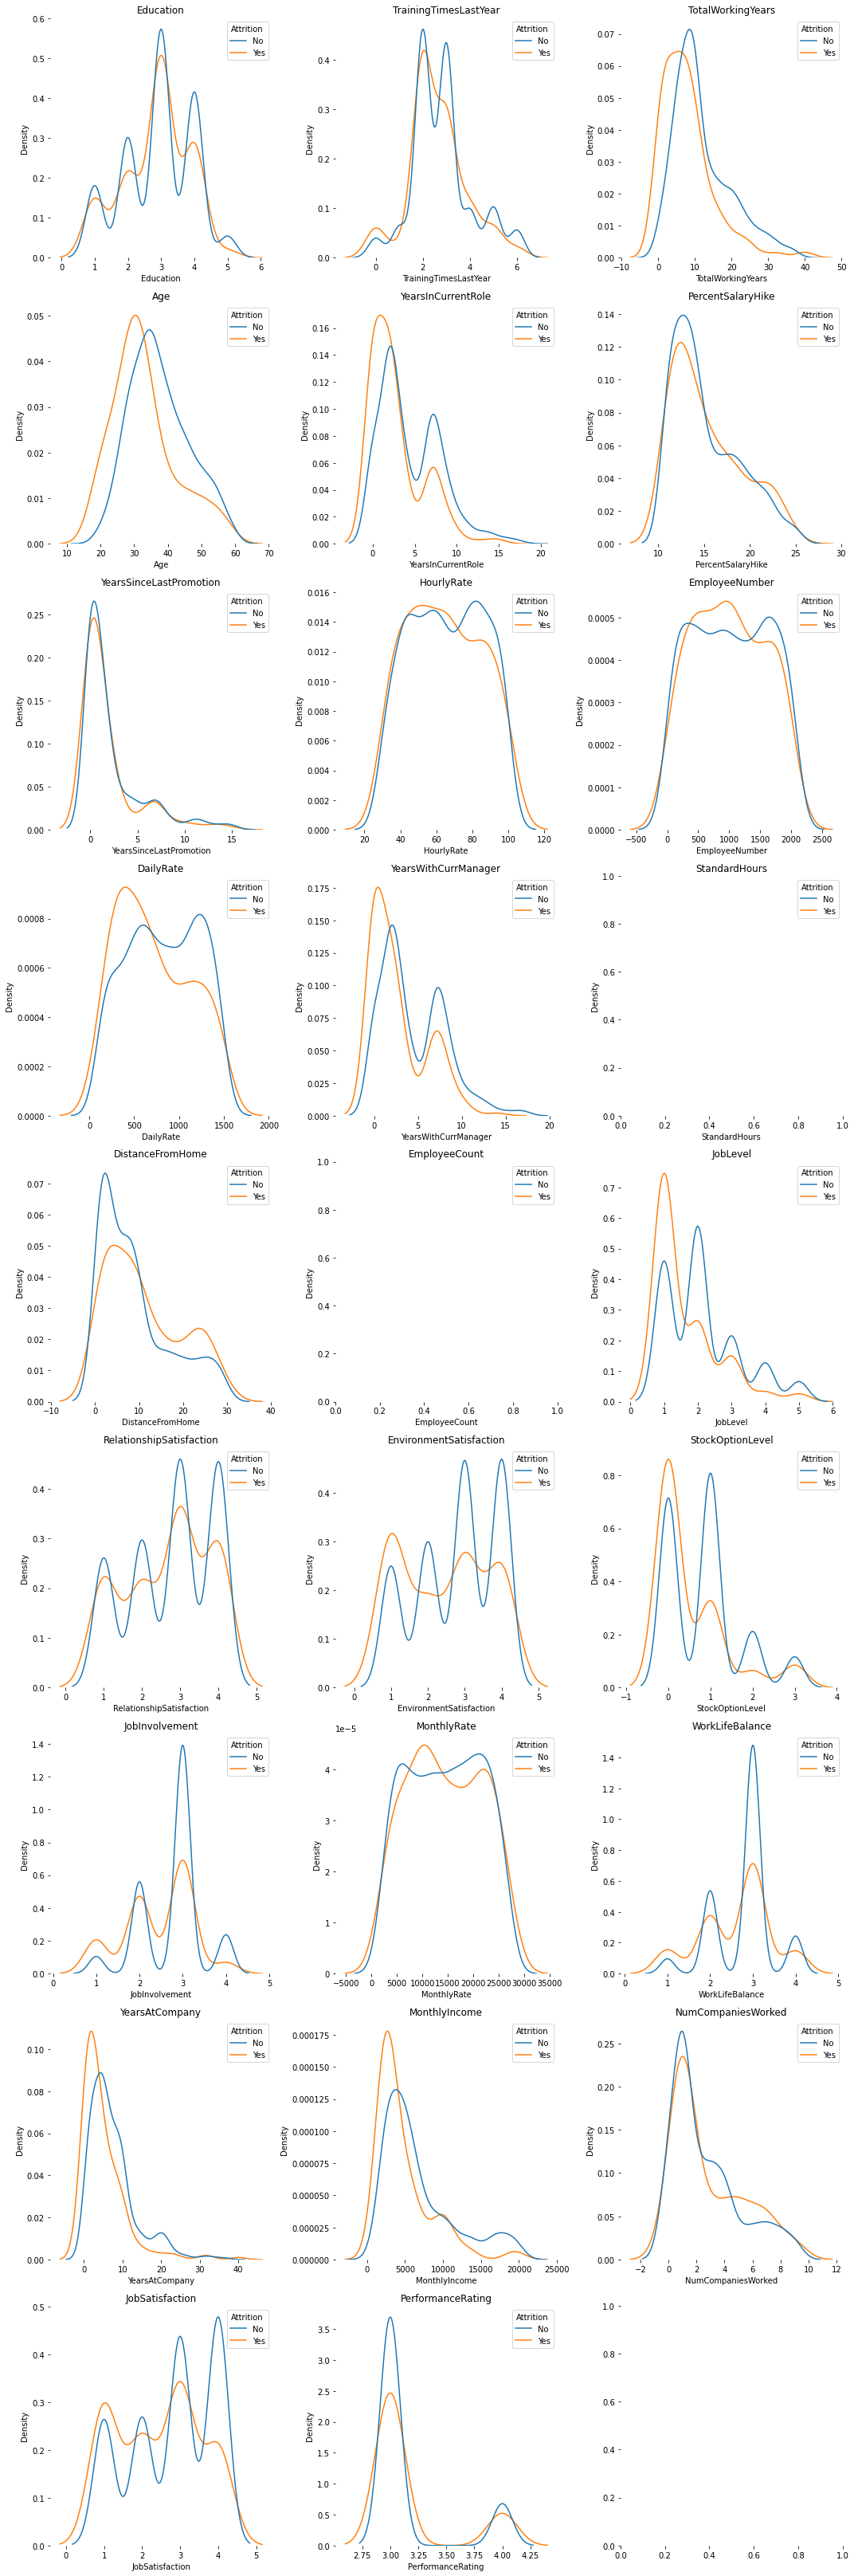

In [38]:
num_rows = 9
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 45))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(numeric_features):
        feature = numeric_features[i]
        plot = sns.kdeplot(x=feature, data=train, common_norm = False, hue="Attrition", ax=ax[row,col])
        plot.set_title(feature)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

* Çoğu kolonda bir attritiona göre farklı dağılım görülebilmekte.
* Environment Satisfaction değeri düşükse Attrition oranı artmakta.
* PerformanceRating değeri düşükse Attrition oranı daha düşük gibi gözüküyor.
* hourly rate 70 in üzerindeyse Attrition daha düşük gözüküyor.
* YearsSinceLastPromotion'ın doğrudan korelasyonu düşük gibi duruyor.
* Stock option var yok şekline getirilebilir.
* Education değerinin doğrudan bir korelasyonu olmayabilir
* Toplam çalışma yılı daha düşük çalışanlar düşük miktarda daha yüksek attrition gösteriyor.
* jobinvolment arttıkça attrition azalıyor gibi duruyor.
* job level 1 olanların attrition oranı ciddi oranda yüksek.
* Genç çalışanlar düşük miktarda daha yüksek attrition gösteriyor.

### Multivariate Analysis

#### Correlation Matrix

In [39]:
le = preprocessing.LabelEncoder()
columns_to_encode = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime", "Attrition"]

train_copy = train.copy()
train_copy[columns_to_encode] = train_copy[columns_to_encode].apply(le.fit_transform)

In [40]:
# ?sns.heatmap

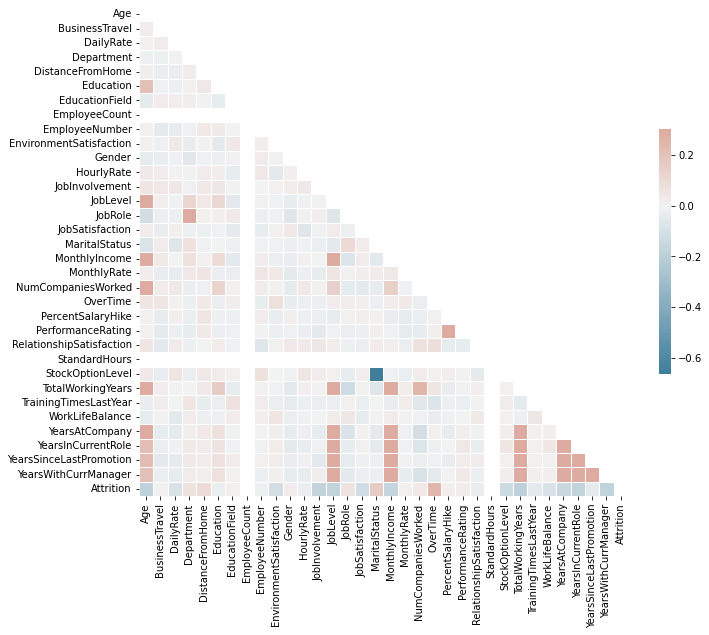

In [41]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = train_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

* Beklendiği üzere yaş ile yıl bazlı kolonların yüksek korelasyonu bulunmakta. MaritalStatus ile StockOptionLevel parametresinin önemli bir korelasyonu mevcut.

#### Farklı Kolonların Etkileşiminin Görselleştirilmesi

In [42]:
# ?sns.barplot

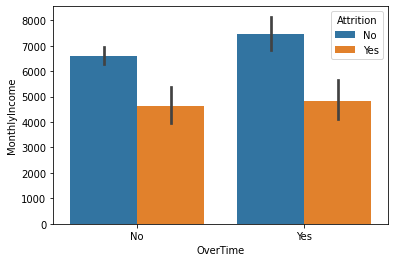

In [43]:
# Fazla mesai ile maaş arasındaki ilişki önemli mi
# Overtime: Binary, Categorical
# MonthlyIncome: Continous
# 3 Attrition: Binary, Categorical
sns.barplot(data=train, x="OverTime", y="MonthlyIncome", hue="Attrition");

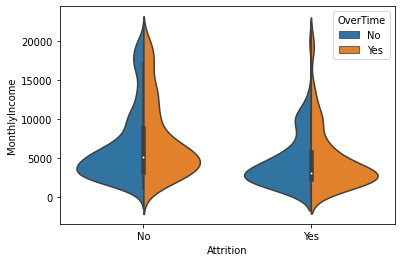

In [44]:
sns.violinplot(data=train, x="Attrition", y="MonthlyIncome", hue="OverTime", split=True);

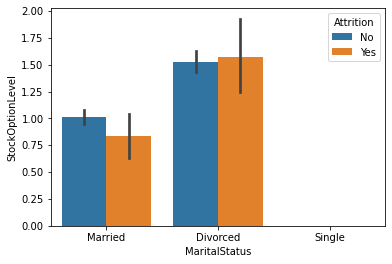

In [45]:
# Marital Status: Binary
# Stock Option: Binary
# Attrition: binary

sns.barplot(data=train, x="MaritalStatus", y="StockOptionLevel", hue="Attrition");

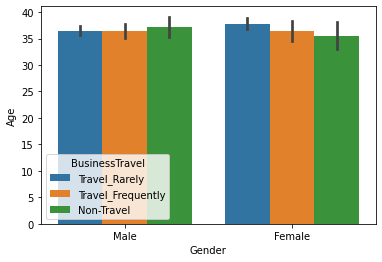

In [46]:
# Yaşına ve Cinsiyetine göre gezmesi önemli mi

# Age: Continous
# Gender: Binary
# BusinessTravel: Binary

sns.barplot(data=train, x="Gender", y="Age", hue="BusinessTravel");

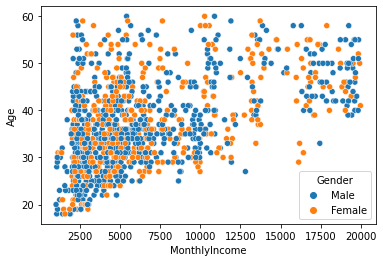

In [47]:
# Yaş: Continous
# Cinsiyet: Binary
# Gelir Durumu: Continous

sns.scatterplot(data=train, x="MonthlyIncome", y="Age", hue="Gender");

**Yorumlar**

Kadın-Erkek ayırt etmeksizin şirket çalışanları genel olarak 25-45 yaş arasındadır
Aylık maaş genel olarak 2500-10000 arasında değişmektedir

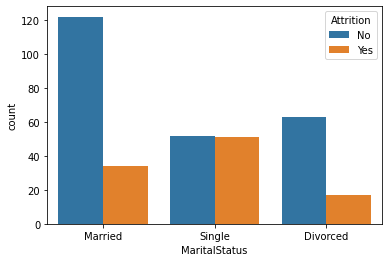

In [48]:
# Evlilik ve Overtime
# MaritalStatus: Binary
# Overtime: Binary
# Attrition: Binary

sns.countplot(data=train[train["OverTime"]== "Yes"], x="MaritalStatus", hue="Attrition");

**Yorumlar**

Evli olanlar genel olarak ek mesai yaptığı için işten ayrılmıyor

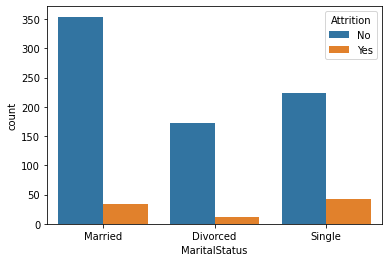

In [49]:
sns.countplot(data=train[train['OverTime'] == 'No'], x="MaritalStatus", hue='Attrition');

**Yorumlar**

Ek mesai yapmayanlar, yapanlara oranla daha az işten ayrılıyor

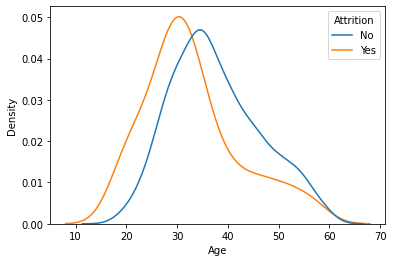

In [50]:
# Age
# Attrition
sns.kdeplot(data=train, x="Age", hue='Attrition', common_norm = False);

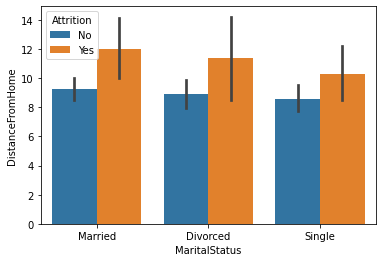

In [51]:
# DistanceFromHome: continous
# MaritalStatus: Binary
# AttritionÇ Binary

sns.barplot(data=train, x="MaritalStatus", y="DistanceFromHome", hue="Attrition");

**Yorumlar**

En çok evliler olmak üzere, evi işyerine uzak olanlar işten ayrılmaktadır

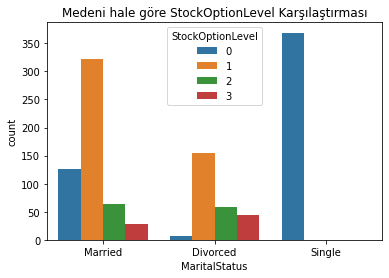

In [52]:
sns.countplot(x="MaritalStatus", hue="StockOptionLevel", data=train).set_title("Medeni hale göre StockOptionLevel Karşılaştırması");

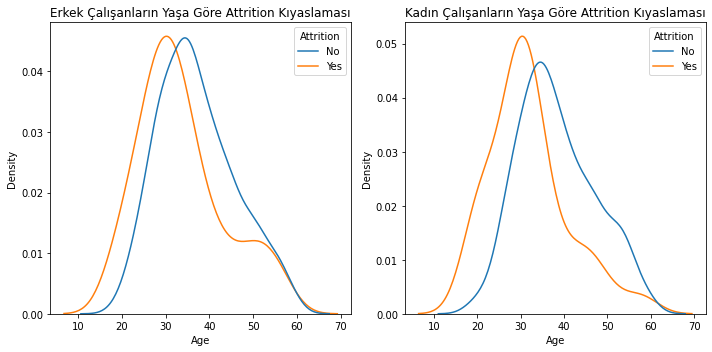

In [53]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

sns.kdeplot(data=train[train["Gender"] == "Male"], ax=ax[0], common_norm = False, x="Age", hue='Attrition').set_title('Erkek Çalışanların Yaşa Göre Attrition Kıyaslaması')
sns.kdeplot(data=train[train["Gender"] == "Female"], ax=ax[1], common_norm = False, x="Age", hue='Attrition').set_title('Kadın Çalışanların Yaşa Göre Attrition Kıyaslaması')
plt.tight_layout()

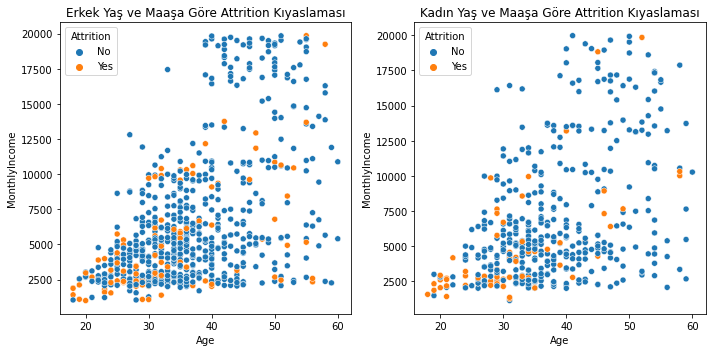

In [54]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))

sns.scatterplot(data=train[train["Gender"] == "Male"], ax=ax[0], x="Age", y="MonthlyIncome", hue='Attrition').set_title('Erkek Yaş ve Maaşa Göre Attrition Kıyaslaması')
sns.scatterplot(data=train[train["Gender"] == "Female"], ax=ax[1], x="Age", y="MonthlyIncome", hue='Attrition').set_title('Kadın Yaş ve Maaşa Göre Attrition Kıyaslaması')
plt.tight_layout()

* Kadın çalışanların yaşı arttıkça attrition oranı düşmekte.
* Yaşa göre alınan maaşın attrition üzerinde belirgin bir etkisi bulunmamakta.

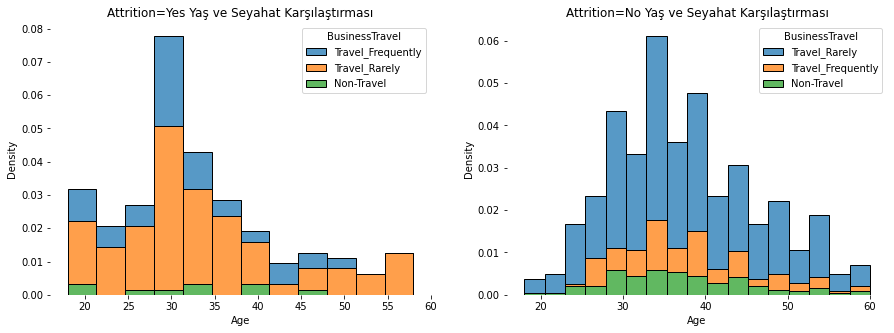

In [55]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

fig1 = sns.histplot(data=train[train["Attrition"] == "Yes"], x="Age", hue="BusinessTravel", multiple="stack", stat="density", ax=ax[0])
fig2 = sns.histplot(data=train[train["Attrition"] == "No"], x="Age", hue="BusinessTravel", multiple="stack", stat="density", ax=ax[1])

fig1.set_title("Attrition=Yes Yaş ve Seyahat Karşılaştırması")
fig2.set_title("Attrition=No Yaş ve Seyahat Karşılaştırması")

sns.despine(left=True, bottom=True)

Rarely veya Frequently seyahat oranı çok yüksek olduğu için çıkarım yapmak güç. Fakat Seyahat etmeyenlerin attrition oranının daha düşük olduğu görülmekte. Fakat yaşa bağlı olarak BusinessTravel kolonunun Attrition üzerinde ciddi bir etkisi olduğu görülmemekte.

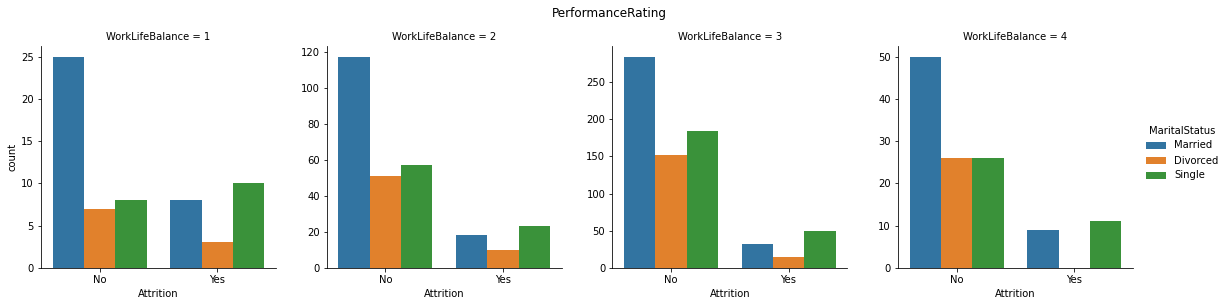

In [56]:
fig = sns.catplot(x="Attrition", kind="count", col="WorkLifeBalance", hue="MaritalStatus", sharey=False, data=train, height=4, col_wrap=4)
fig.fig.suptitle(feature, y=1.05);

Medeni hale göre İş-Hayat dengesinin Attrition üzerinde ciddi bir etkisi görülmemekte.

### Veri Analizi Yorumları

-

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Düzenleme

In [57]:
train_cleaned = train.copy()

train_cleaned["Attrition"] = train_cleaned["Attrition"].map({"Yes": 1, "No": 0})

### Gereksiz Kolonların Silinmesi

* BusinessTravel, Departmant, EducationField ve MaritalStatus metin olarak verilmiş, nümerik format olması gerekir
* Over18 kaldırılacak
* EmployeeCount Silinecek
* EmployeeNumber silinecek
* StandartHours Kaldırılacak

In [58]:
train_cleaned.shape

(1176, 35)

In [59]:
columns_to_remove = ["EmployeeCount", "StandardHours", "Over18"]

train_cleaned = train_cleaned.drop(columns=columns_to_remove)

In [60]:
train_cleaned.shape

(1176, 32)

In [61]:
train_cleaned

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1989,4,Male,...,3,0,12,6,2,12,8,1,7,0
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1644,3,Male,...,2,1,23,3,3,2,2,2,2,0
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,497,4,Male,...,2,1,5,2,3,5,2,0,4,0
3,34,Travel_Rarely,704,Sales,28,3,Marketing,2035,4,Female,...,4,2,8,2,3,8,7,1,7,0
4,23,Travel_Frequently,638,Sales,9,3,Marketing,2023,4,Male,...,1,1,1,3,2,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,1019,2,Male,...,1,1,4,3,2,4,3,1,1,0
1172,30,Travel_Rarely,1275,Research & Development,28,2,Medical,441,4,Female,...,4,2,11,2,3,10,8,1,9,0
1173,40,Non-Travel,1151,Research & Development,9,5,Life Sciences,287,4,Male,...,4,1,5,5,1,3,2,0,2,0
1174,34,Travel_Frequently,658,Research & Development,7,3,Life Sciences,147,1,Male,...,4,0,9,3,3,9,7,0,6,1


In [62]:
train_cleaned.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

### Yeni Özniteliklerin Yaratılması (Mümkünse)

### Ortalama Attrition Değeri

In [63]:
# Tecrübe Yılı / Çalıştığı Şirket Sayısı

train_cleaned["MeanAttritionYear"] = train_cleaned["TotalWorkingYears"] / (train_cleaned["NumCompaniesWorked"] + 1)

In [64]:
train_cleaned["MeanAttritionYear"].describe()

count    1176.000000
mean        4.184091
std         3.925013
min         0.000000
25%         1.666667
50%         3.000000
75%         5.000000
max        38.000000
Name: MeanAttritionYear, dtype: float64

In [65]:
train_cleaned["MeanAttritionYear"].corr(train_cleaned["Attrition"])

-0.17991854327339454

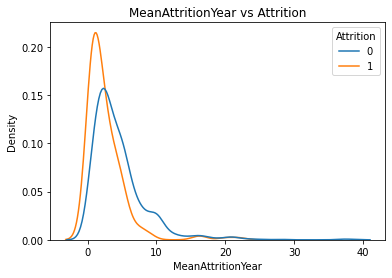

In [66]:
fig = sns.kdeplot(data=train_cleaned, x="MeanAttritionYear", hue="Attrition", common_norm=False);
fig.set_title("MeanAttritionYear vs Attrition");

* Yeni yarattığımız kolonun Attrition değeri ile arasında bir negatif korelasyon var. MeanAttritionYear değeri ne kadar yüksekse Attrition ihtimali o kadar azalıyor.

#### Tecrübenin Kategorik hale getirilmesi

In [67]:
bins = pd.IntervalIndex.from_tuples([(-1, 5), (5, 10), (10, 15), (15,100)])
cat_YearsAtCompany = pd.cut(train_cleaned["YearsAtCompany"].to_list(), bins)
cat_YearsAtCompany.categories = [0,1,2,3]

In [68]:
train_cleaned["YearsAtCompanyCat"] = cat_YearsAtCompany
train_cleaned["YearsAtCompanyCat"]

0       2
1       0
2       0
3       1
4       0
       ..
1171    0
1172    1
1173    0
1174    1
1175    0
Name: YearsAtCompanyCat, Length: 1176, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [69]:
train_cleaned["YearsAtCompany"].corr(train_cleaned["Attrition"])

-0.1499831466318739

In [70]:
train_cleaned["YearsAtCompanyCat"].corr(train_cleaned["Attrition"])

-0.14172852265465494

#### OneHotEncoding

In [71]:
# Attrition değişkeni yukarıda 0-1 olarak değiştirildi.
columns_to_encode = [
    "BusinessTravel", "Department", "EducationField", 
    "Gender", "JobRole", "MaritalStatus", "OverTime"
]

In [72]:
# Bu şekilde manuel dönüştürme yapılabilir. Bunun yerine sklearn labelEncoder kullanılabilir.
# Veya olduğu gibi bırakıp işi OneHotEncoder'ın halletmesi beklenebilir.
#train_cleaned["BusinessTravel"] = train_cleaned["BusinessTravel"].map(
#    {"Travel_Rarely": 1, "Travel_Frequently": 2, "Non-Travel": 0})

In [73]:
train_cleaned["Attrition"].unique()

array([0, 1], dtype=int64)

In [74]:
encoder = OneHotEncoder(drop='if_binary')
encoder_df = pd.DataFrame(encoder.fit_transform(train_cleaned[columns_to_encode]).toarray())
column_names = encoder.get_feature_names(columns_to_encode)
column_names

array(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes'], dtype=object)

##### Save

In [75]:
with open("Pickles//onehot_encoder.pkl","wb")as f:
    pickle.dump(encoder,f)

In [76]:
encoder_df.columns = column_names

In [77]:
train_cleaned.drop(columns=columns_to_encode, inplace=True, axis=1)
train_cleaned = train_cleaned.join(encoder_df)

#### Feature Extraction Kontrol

In [78]:
train_cleaned.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,30,911,1,2,1989,4,76,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,48,365,4,5,1644,3,89,2,4,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,27,1469,1,2,497,4,82,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,34,704,28,3,2035,4,95,2,2,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,23,638,9,3,2023,4,33,3,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [79]:
train_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1176.0,36.859694,9.115610,18.0,30.000000,35.0,43.00,60.0
DailyRate,1176.0,804.922619,402.627249,102.0,466.750000,802.0,1163.25,1499.0
DistanceFromHome,1176.0,9.329082,8.109130,1.0,2.000000,7.0,14.00,29.0
Education,1176.0,2.897959,1.030495,1.0,2.000000,3.0,4.00,5.0
EmployeeNumber,1176.0,1024.346939,606.582338,2.0,490.250000,1012.5,1570.25,2065.0
EnvironmentSatisfaction,1176.0,2.724490,1.093398,1.0,2.000000,3.0,4.00,4.0
HourlyRate,1176.0,65.544218,20.202669,30.0,48.000000,65.0,83.00,100.0
JobInvolvement,1176.0,2.714286,0.718154,1.0,2.000000,3.0,3.00,4.0
JobLevel,1176.0,2.058673,1.094260,1.0,1.000000,2.0,3.00,5.0
JobSatisfaction,1176.0,2.723639,1.102100,1.0,2.000000,3.0,4.00,4.0


In [80]:
train_cleaned.dtypes

Age                                     int64
DailyRate                               int64
DistanceFromHome                        int64
Education                               int64
EmployeeNumber                          int64
EnvironmentSatisfaction                 int64
HourlyRate                              int64
JobInvolvement                          int64
JobLevel                                int64
JobSatisfaction                         int64
MonthlyIncome                           int64
MonthlyRate                             int64
NumCompaniesWorked                      int64
PercentSalaryHike                       int64
PerformanceRating                       int64
RelationshipSatisfaction                int64
StockOptionLevel                        int64
TotalWorkingYears                       int64
TrainingTimesLastYear                   int64
WorkLifeBalance                         int64
YearsAtCompany                          int64
YearsInCurrentRole                

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


### Öznitelik Seçimi

#### Yöntem 1: Kolineer Özniteliklerin Silinmesi

In [81]:
# Kolerasyon matrixinde mutlak değerlerin çıkarılması

corr_matrix = train_cleaned.corr().abs()
corr_matrix.head().T

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber
Age,1.000000,0.007605,0.016341,0.206040,0.005868
DailyRate,0.007605,1.000000,0.023193,0.018384,0.038290
DistanceFromHome,0.016341,0.023193,1.000000,0.037325,0.036699
Education,0.206040,0.018384,0.037325,1.000000,0.029517
EmployeeNumber,0.005868,0.038290,0.036699,0.029517,1.000000
EnvironmentSatisfaction,0.006536,0.039596,0.002459,0.047632,0.015935
HourlyRate,0.030195,0.000717,0.024361,0.014320,0.036977
JobInvolvement,0.044573,0.044121,0.034573,0.041072,0.002775
JobLevel,0.525635,0.011012,0.031966,0.101166,0.010470
JobSatisfaction,0.020958,0.013897,0.012575,0.009864,0.034716


In [82]:
# Kolerasyon üçgeninin oluşturulması

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head().T

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber
Age,NaN,NaN,NaN,NaN,NaN
DailyRate,0.007605,NaN,NaN,NaN,NaN
DistanceFromHome,0.016341,0.023193,NaN,NaN,NaN
Education,0.206040,0.018384,0.037325,NaN,NaN
EmployeeNumber,0.005868,0.038290,0.036699,0.029517,NaN
EnvironmentSatisfaction,0.006536,0.039596,0.002459,0.047632,0.015935
HourlyRate,0.030195,0.000717,0.024361,0.014320,0.036977
JobInvolvement,0.044573,0.044121,0.034573,0.041072,0.002775
JobLevel,0.525635,0.011012,0.031966,0.101166,0.010470
JobSatisfaction,0.020958,0.013897,0.012575,0.009864,0.034716


In [83]:
# Özniteliklerin silinme threshold'u
# Bu öznitelikler sadece tek boyutta bakılıyor. Nonlineeri anlayamaz.

threshold = 0.8

In [84]:
# Thresholdun üzerindeki korelasyonların seçilmesi
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Silinecek kolon sayısı: {len(to_drop)}")
for index, column in enumerate(to_drop):
    print(f"{index + 1}. Kolon: {column}")

Silinecek kolon sayısı: 4
1. Kolon: MonthlyIncome
2. Kolon: Department_Sales
3. Kolon: JobRole_Human Resources
4. Kolon: JobRole_Sales Executive


In [85]:
selection1 = train_cleaned.drop(columns = to_drop)
selection1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1176.0,36.859694,9.115610,18.0,30.000000,35.0,43.00,60.0
DailyRate,1176.0,804.922619,402.627249,102.0,466.750000,802.0,1163.25,1499.0
DistanceFromHome,1176.0,9.329082,8.109130,1.0,2.000000,7.0,14.00,29.0
Education,1176.0,2.897959,1.030495,1.0,2.000000,3.0,4.00,5.0
EmployeeNumber,1176.0,1024.346939,606.582338,2.0,490.250000,1012.5,1570.25,2065.0
EnvironmentSatisfaction,1176.0,2.724490,1.093398,1.0,2.000000,3.0,4.00,4.0
HourlyRate,1176.0,65.544218,20.202669,30.0,48.000000,65.0,83.00,100.0
JobInvolvement,1176.0,2.714286,0.718154,1.0,2.000000,3.0,3.00,4.0
JobLevel,1176.0,2.058673,1.094260,1.0,1.000000,2.0,3.00,5.0
JobSatisfaction,1176.0,2.723639,1.102100,1.0,2.000000,3.0,4.00,4.0


In [86]:
# Correlation matrix'den seçerek de silebiliriz.

In [87]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

selection2 = train_cleaned.drop(columns=['Attrition'])
selection2 = sel.fit_transform(selection2)

selection2

array([[3.000e+01, 9.110e+02, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.800e+01, 3.650e+02, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.700e+01, 1.469e+03, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [4.000e+01, 1.151e+03, 9.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.400e+01, 6.580e+02, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e+01, 1.290e+02, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [88]:
labels = train_cleaned['Attrition']
labels.head()

0    0
1    0
2    0
3    0
4    1
Name: Attrition, dtype: int64

In [89]:
selection3 = train_cleaned.drop(columns=['Attrition'])

In [90]:
selection3.shape

(1176, 52)

In [91]:
# Select k best

selection3 = SelectKBest(chi2, k=10).fit_transform(selection3, labels)

In [92]:
selection3

array([[3.00000000e+01, 9.11000000e+02, 1.00000000e+00, ...,
        8.00000000e+00, 7.00000000e+00, 6.00000000e+00],
       [4.80000000e+01, 3.65000000e+02, 4.00000000e+00, ...,
        2.00000000e+00, 2.00000000e+00, 7.66666667e+00],
       [2.70000000e+01, 1.46900000e+03, 1.00000000e+00, ...,
        2.00000000e+00, 4.00000000e+00, 2.50000000e+00],
       ...,
       [4.00000000e+01, 1.15100000e+03, 9.00000000e+00, ...,
        2.00000000e+00, 2.00000000e+00, 5.00000000e-01],
       [3.40000000e+01, 6.58000000e+02, 7.00000000e+00, ...,
        7.00000000e+00, 6.00000000e+00, 4.50000000e+00],
       [2.00000000e+01, 1.29000000e+02, 4.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01]])

In [93]:
selection3.shape

(1176, 10)

In [94]:
# LinearSVC feature selection

selection4 = train_cleaned.drop(columns=['Attrition'])
selection4.shape

(1176, 52)

In [95]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(selection4, labels)
model = SelectFromModel(lsvc, prefit=True)
selection4 = model.transform(selection4)
selection4.shape

(1176, 18)

In [96]:
feature_idx = model.get_support()
print(feature_idx)


[ True  True  True False False  True  True  True False  True  True False
  True  True False False  True  True False False  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True]


In [97]:
new_train = train_cleaned.drop(columns=['Attrition'])

feature_name = new_train.columns[feature_idx]
feature_name

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MeanAttritionYear',
       'OverTime_Yes'],
      dtype='object')

In [98]:
# Tree-based feature selection

selection5 = train_cleaned.drop(columns=['Attrition'])
selection5.shape

(1176, 52)

In [99]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(selection5, labels)
clf.feature_importances_  

array([0.03552063, 0.02805999, 0.03216577, 0.02066164, 0.02181679,
       0.03270518, 0.02491526, 0.0329817 , 0.02469293, 0.02722975,
       0.02902373, 0.0238989 , 0.02350567, 0.02306402, 0.01062029,
       0.02618656, 0.0201574 , 0.0299255 , 0.0230399 , 0.03499555,
       0.02778984, 0.03086673, 0.02057499, 0.03016459, 0.03159985,
       0.01529328, 0.00709991, 0.01631271, 0.01182825, 0.00240731,
       0.00836616, 0.00879673, 0.00491655, 0.0148907 , 0.00897578,
       0.01532323, 0.00545316, 0.01282871, 0.02051709, 0.00567593,
       0.00339358, 0.01745384, 0.00346152, 0.00526764, 0.00244744,
       0.0108221 , 0.01127485, 0.01361742, 0.00852199, 0.01329166,
       0.02786754, 0.05773175])

In [100]:
model = SelectFromModel(clf, prefit=True)
selection5 = model.transform(selection5)
selection5.shape

(1176, 27)

In [101]:
# Feature Selection as part of a pipeline

selection6 = train_cleaned.drop(columns=['Attrition'])
selection6.shape

(1176, 52)

In [102]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
#clf.fit(selection6, labels)

In [103]:
# Model eğittikten sonra feature importance ölçülmektedir. 
# Özniteliklerin önemini model eğittikten sonra grafik olarak koyabiliriz.

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Model Eğitimi 

| **Model** | **Avantajları** | **Dezavantajları** |
| --- | --- | --- |
| **Lojistik Regresyon** | Olasılıksal yaklaşım, özelliklerin istatistiksel önemi hakkında bilgi verir | Lojistik Regresyon Varsayımları |
| **K-NN** | Anlaması basit, hızlı ve verimli | Komşuların k sayısını doğru seçmek gerekir |
| **SVM** | Sonuca ulaşma performansı iyi, aykırı değerler hakkında önyargılı değil, aşırı öğrenmeye (overfittting) duyarlı değildir | Doğrusal olmayan problemler için uygun değildir, yüksek değerdeki özellikler için en iyi seçenek değildir |
| **Kernel SVM** | Doğrusal olmayan problemlerde yüksek performanslıdır, aykırı değerler hakkında hassas değil, aşırı öğrenmeye (overfitting) duyarlı değildir | Yüksek değerdeki özellikler için en iyi seçenek değil, daha karmaşık |
| **Naive Bayes** | Verimli, aykırı değerler hakkında önyargılı değil, doğrusal olmayan problemler üzerinde çalışır, olasılıksal yaklaşımdır | Özelliklerin aynı istatistiksel anlamlılığa sahip olduğu varsayımına dayanır |
| **Karar Ağacı Sınıflandırması** | Yorumlama, özellik ölçeklendirmesine gerek yoktur, hem doğrusal hem de doğrusal olmayan problemler üzerinde çalışır | Çok küçük veri kümeleri üzerinde zayıf sonuçlar, aşırı öğrenme (overfitting) kolaylıkla gerçekleşebilir |

### Karmaşıklık Matrisi

**C1 kanserdir, C2 kanser değildir olacak şekilde**

|  | **C1** | **C2** |
| --- | --- | --- |
| **C1** | True positive | False negative |
| **C2** | False positive | True negative |

**Bu örnekte sütunlar gerçek değerler, satırlar tahmin değerleridir**

<br>

|  |  |
| --- | --- |
| Sensitivity - True Positive Rate | ${\displaystyle {\frac {TP}{P}} = {\frac {TP}{TP+FN}}}$ |
| Specificity - True Negative Rate | ${\displaystyle {\frac {TN}{N}} = {\frac {TN}{TN+FP}}}$ |
| Precision - Positive Predicted Value | ${\displaystyle {\frac {TP}{TP+FP}}}$ |
| Negative Predicted Value | ${\displaystyle {\frac {TN}{TN+FN}}}$ |
| Fall-out - False Positive Rate | ${\displaystyle {\frac {FP}{N}} = {\frac {FP}{TN+FP}}}$ |
| False Discovery Rate | ${\displaystyle {\frac {FP}{TP+FP}}}$ |
| Miss Rate - False Negative Rate | ${\displaystyle {\frac {FN}{P}} = {\frac {FN}{TP+FN}}}$ |
| Accuracy | ${\displaystyle {\frac {TP+TN}{Total}}}$ |
| F1 Score | ${\displaystyle {\frac {2TP}{2TP+FP+FN}}}$ |


<br><hr><br>

| n = 165 | **Predicted: No** | **Predicted: Yes** | **Total** |
| --- | --- | --- | --- |
| **Actual: No** | TN = 50 | FP = 10 | 60 |
| **Actual: Yes** | FN = 5 | TP = 100 | 105 |
| **Total** | 55 | 110 | **165** |

<br>

* **Accuracy:** Kaç doğru sınıflandırma var?
    * (TP/TN)/Total = (100+50)/165 = **0.91**
* **Missclassification Rate:** Kaç yanlış sınıflandırma yapılmıştır?
    * (FP+FN)/Total = (10+5)/165 = **0.09**
    * = 1 - Accuracy
    * "Error Rate" olarak da geçer
* **True Positive Rate:** Gerçekte Yes ise kaçı doğru sınıflanmıştır?
    * (TP)/(Actual: Yes) = 100/105 = **0.95**
    * Aynı zamanda "Sensitivity" veya "Reall" da denir
* **False Positive Rate:** Tahmin No ise bu sonuçların kaçı doğru sınıflanmıştır?
    * (FP)/(Actual: No) = 10/60 = **0.17**
* **Specifity:** Gerçekte No ise bu sonuçların kaçı doğru sınıflanmıştır?
    * (TN)/(Actual: No) = 50/60 = **0.83**
    * 1 - (False Positive Rate) olrak da hesaplanır
* **Precision:** Tahmin Yes ise kaçı doğru sınıflandırılmıştır?
    * (TP)/(Predicted: Yes) = 100/110 = **0.91**
* **Prevalence:** Gerçekte Yes dağılım oranı kaçtır?
    * (Actual: Yes)/(Total) = 105/165 = **0.64**

### MINI DEMO

In [104]:
dummy_y_true = [1, 1, 1, 0, 0, 0]
dummy_y_pred = [1, 1, 0, 1, 1, 0]
dummy_y_prob = [0.95, 0.55, 0.05, 0.55, 0.65, 0.10]

acc = metrics.accuracy_score(dummy_y_true, dummy_y_pred)
p = metrics.precision_score(dummy_y_true, dummy_y_pred)
r = metrics.recall_score(dummy_y_true, dummy_y_pred)
f1 = metrics.f1_score(dummy_y_true, dummy_y_pred)

fpr, tpr, thresholds = metrics.roc_curve(dummy_y_true, dummy_y_prob)
roc_auc = metrics.auc(fpr, tpr)

precision, recall, thresholds = metrics.precision_recall_curve(dummy_y_true, dummy_y_prob)
pr_auc = metrics.auc(fpr, tpr)

In [105]:
pd.DataFrame({
    "acc":acc,
    "p":p,
    "r":r,
    "f1":f1,
    "roc_auc":roc_auc,
    # "pr_auc":pr_auc
}, index=["values"])

,acc,p,r,f1,roc_auc
values,0.5,0.5,0.666667,0.571429,0.5


Text(0, 0.5, 'TPR')

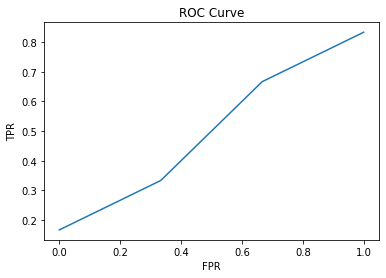

In [106]:
ax = sns.lineplot(x=fpr, y=tpr, ci=None)
ax.set_title('ROC Curve')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

Text(0, 0.5, 'Precision')

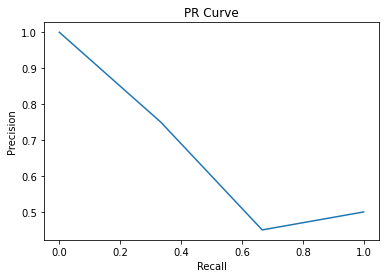

In [107]:
ax = sns.lineplot(x=recall, y=precision, ci=None)
ax.set_title('PR Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')

### Attrition Prediction

#### Başarım Ölçüm Fonksiyonları

In [108]:
def eval_clf(y_true, y_pred):
    acc = metrics.accuracy_score(y_true, y_pred)
    p = metrics.precision_score(y_true, y_pred)
    r = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    
    result = {
        "acc":acc,
        "p":p,
        "r":r,
        "f1":f1
    }

    return result

def eval_auc(y_true, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob)
    precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_prob)
    
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    
    result = {
        "roc_auc": roc_auc,
        "pr_auc": pr_auc
    }
    
    return result

def eval_threshold(y_true, y_prob, threshold):
    y_pred = np.where(np.array(y_prob) > threshold, 1, 0)
    
    return eval_clf(y_true, y_pred)

In [109]:
# TEST

dummy_y_true = [1, 1, 1, 0, 0, 0]
dummy_y_pred = [1, 1, 0, 1, 1, 0]
dummy_y_prob = [0.95, 0.55, 0.05, 0.55, 0.65, 0.10]

print("-" * 15)
print("EVAL_CLF")
for i in eval_clf(dummy_y_true,dummy_y_pred).items():
    print(f"{i}")
print("-" * 15)

print("EVAL_AUC")
for i in eval_auc(dummy_y_true,dummy_y_prob).items():
    print(f"{i}")
print("-" * 15)

print("EVAL_THRESHOLD (0.5)")
for i in eval_threshold(dummy_y_true,dummy_y_prob,0.5).items():
    print(f"{i}")
print("-" * 15)

print("EVAL_THRESHOLD (0.7)")
for i in eval_threshold(dummy_y_true,dummy_y_prob,0.7).items():
    print(f"{i}")
print("-" * 15)

---------------
EVAL_CLF
('acc', 0.5)
('p', 0.5)
('r', 0.6666666666666666)
('f1', 0.5714285714285715)
---------------
EVAL_AUC
('roc_auc', 0.5)
('pr_auc', 0.6499999999999999)
---------------
EVAL_THRESHOLD (0.5)
('acc', 0.5)
('p', 0.5)
('r', 0.6666666666666666)
('f1', 0.5714285714285715)
---------------
EVAL_THRESHOLD (0.7)
('acc', 0.6666666666666666)
('p', 1.0)
('r', 0.3333333333333333)
('f1', 0.5)
---------------


In [110]:
def tuning_result(y_test, y_pred):
    print(f"accuracy = {accuracy_score(y_test, y_pred)}")
    print(f"precision = {precision_score(y_test, y_pred)}")
    print(f"recall = {recall_score(y_test, y_pred)}")
    print(f"f1 = {f1_score(y_test, y_pred)}")

#### Veri Hazırlığı

In [111]:
y_data = train_cleaned["Attrition"]
x_data = train_cleaned.drop(columns=["Attrition"])
print(x_data.shape)
print(y_data.shape)
assert x_data.shape[0] == y_data.shape[0]

(1176, 52)
(1176,)


In [112]:
x_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,30,911,1,2,1989,4,76,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,48,365,4,5,1644,3,89,2,4,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,27,1469,1,2,497,4,82,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,34,704,28,3,2035,4,95,2,2,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,23,638,9,3,2023,4,33,3,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,22,217,8,1,1019,2,94,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1172,30,1275,28,2,441,4,64,3,2,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1173,40,1151,9,5,287,4,63,2,2,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1174,34,658,7,3,147,1,66,1,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [113]:
x_data = x_data.drop(columns=["EmployeeNumber"])

In [114]:
x_data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,30,911,1,2,4,76,3,1,2,3748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,48,365,4,5,3,89,2,4,4,15202,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,27,1469,1,2,4,82,3,1,2,3816,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,34,704,28,3,4,95,2,2,3,6712,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,23,638,9,3,4,33,3,1,1,1790,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,22,217,8,1,2,94,1,1,1,2451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1172,30,1275,28,2,4,64,3,2,4,5775,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1173,40,1151,9,5,4,63,2,2,4,4876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1174,34,658,7,3,1,66,1,2,3,6074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [115]:
x_train, x_val, y_train, y_val = train_test_split(
    x_data.values,
    y_data.values,
    test_size=0.15,
    stratify=y_data,
    random_state=42
)

### Logistic Regression

Amaç, sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır
<br><br>
**Lojistik Dağılım Fonksiyonu:**
<br><br>
${\displaystyle \pi (x) = P(Y = 1|X = x) = {\frac {e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p}}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p)}}}}$
<br><br><br>
**Lojistik Dağılım Fonksiyonunun Odds'u:**
<br><br>
${\displaystyle {\frac {\pi (x)}{1- \pi (x)}}}$
<br><br><br>
**Logistik Regresyon Modeli:**
<br><br>
${\displaystyle g(x) = ln{\frac {\pi (x)}{1 - \pi ()}} = {\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p}}$
<br><br>
* Bağımlı değişken kategoriktir
* Adını bağımlı değişkene uygulayan logit dönüşümden alır
* Doğrusal Regresyon da aranan varsayımla burada aranmadığı için daha esnek kullanılabilirliği vardır
* Bağımlı değişkenin 1 olarak tanımlanan değerinin gerçekleşme olasılığı hesaplanır, dolayısıyla bağımlı değişkenin alacağı değer ile ilgilenilmez
* Lojistik fonksiyonu sayesinde üretilen değerler 0-1 arasında olur

In [116]:
classifier = LogisticRegression(max_iter=10000, random_state=42)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [117]:
y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)

print(f"y_pred: \n{y_pred}")
print(f"y_prob: \n{y_prob_2d}")

y_pred: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_prob: 
[[9.84907008e-01 1.50929923e-02]
 [9.11379627e-01 8.86203725e-02]
 [9.21027252e-01 7.89727480e-02]
 [9.47898768e-01 5.21012322e-02]
 [9.73094732e-01 2.69052677e-02]
 [7.80602085e-01 2.19397915e-01]
 [9.82928875e-01 1.70711251e-02]
 [9.21336170e-01 7.86638303e-02]
 [5.53794013e-01 4.46205987e-01]
 [9.83480100e-01 1.65199002e-02]
 [9.95274669e-01 4.72533074e-03]
 [7.60463472e-01 2.39536528e-01]
 [9.94855529e-01 5.14447071e-03]
 [9.57766071e-01 4.22339292e-02]
 [9.99529364e-01 4.70635680e-04]
 [7.65070928e-01 2.34929072e-01]
 [7.88369924e-01 2.11630076e-01]
 [9.89962565e-01 1.00374349e-02]
 [9.97933836e-01 2.06616449e

In [118]:
y_prob = y_prob_2d[:, 1]
y_prob

array([1.50929923e-02, 8.86203725e-02, 7.89727480e-02, 5.21012322e-02,
       2.69052677e-02, 2.19397915e-01, 1.70711251e-02, 7.86638303e-02,
       4.46205987e-01, 1.65199002e-02, 4.72533074e-03, 2.39536528e-01,
       5.14447071e-03, 4.22339292e-02, 4.70635680e-04, 2.34929072e-01,
       2.11630076e-01, 1.00374349e-02, 2.06616449e-03, 1.62113484e-01,
       6.49758217e-03, 7.88311251e-02, 8.71897970e-03, 3.60706460e-01,
       1.52832550e-01, 5.92428959e-02, 6.09077864e-04, 1.27152219e-01,
       6.46394072e-02, 2.77493903e-01, 3.44853122e-02, 1.18443713e-01,
       4.95489468e-02, 4.19002856e-01, 8.97213867e-04, 1.06879709e-01,
       7.81730676e-01, 4.23278619e-02, 2.61271848e-02, 5.02895254e-02,
       5.26049950e-01, 6.51433534e-04, 6.04675584e-03, 1.48491368e-02,
       6.28720792e-01, 1.89202402e-01, 5.31445173e-02, 8.23768838e-01,
       6.45326806e-02, 5.47964272e-03, 9.81118360e-03, 3.56741404e-02,
       7.37863478e-02, 9.98091647e-02, 2.12077909e-03, 2.47415420e-02,
      

In [119]:
print("-" * 15)

print("RES_CLF")
for i in eval_clf(y_val,y_pred).items():
    print(f"{i}")
print("-" * 15)

print("RES_AUC")
for i in eval_auc(y_val,y_prob).items():
    print(f"{i}")
print("-" * 15)

---------------
RES_CLF
('acc', 0.8757062146892656)
('p', 0.6875)
('r', 0.39285714285714285)
('f1', 0.5)
---------------
RES_AUC
('roc_auc', 0.8168744007670183)
('pr_auc', 0.5649825529323342)
---------------


#### Logistic Regression with Scaling

In [120]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

In [121]:
classifier = LogisticRegression(max_iter=10000, random_state = 42)
classifier.fit(x_train_scaled, y_train)

y_pred = classifier.predict(x_val_scaled)
y_prob_2d = classifier.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [122]:
print("-" * 15)
print('RES_CLF')
for i in eval_clf(y_val, y_pred).items():
    print(f"{i}")

print("-" * 15)
print('RES_AUC')
for i in eval_auc(y_val, y_prob).items():
    print(f"{i}")

---------------
RES_CLF
('acc', 0.8700564971751412)
('p', 0.6666666666666666)
('r', 0.35714285714285715)
('f1', 0.46511627906976744)
---------------
RES_AUC
('roc_auc', 0.8302972195589645)
('pr_auc', 0.5751255536107229)


In [123]:
eval_threshold(y_val, y_prob, threshold=0.3)

{'acc': 0.8305084745762712,
 'p': 0.4666666666666667,
 'r': 0.5,
 'f1': 0.4827586206896552}

#### Logistic Regression with Different Hyperparameters

In [124]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

In [125]:
# X_train ve X_val yerine X_train_scaled ve X_val_scaled koymayi dene
# C parametresiyle oynamayi dene
# Dokumentasyon sayfasindan diger parametlere goz at ve oyna
classifier = LogisticRegression(max_iter=10000, C=2, random_state = 42)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)
y_prob = y_prob_2d[:, 1]

In [126]:
print("-" * 15)
print("res_clf")
for i in eval_clf(y_val, y_pred).items():
    print(f"{i}")

print("-" * 15)
print("res_auc")
for i in eval_auc(y_val, y_prob).items():
    print(f"{i}")

---------------
res_clf
('acc', 0.8700564971751412)
('p', 0.6470588235294118)
('r', 0.39285714285714285)
('f1', 0.4888888888888888)
---------------
res_auc
('roc_auc', 0.8154362416107382)
('pr_auc', 0.5651796641024074)


In [127]:
print(f"{classifier.intercept_}")
print(f"{classifier.coef_}")

[0.40298812]
[[-2.55507811e-02 -4.96612641e-04  5.67814935e-02  1.49491064e-01
  -3.03269222e-01 -5.01588739e-04 -5.43783234e-01 -1.54141106e-01
  -2.40758123e-01 -6.95849307e-06  7.70639241e-06  7.38874880e-02
  -4.50265210e-03  6.29728050e-01 -1.15974073e-01 -3.61893042e-01
  -3.75730629e-02 -8.71001228e-02 -2.51266890e-01  1.11618156e-01
  -1.76443681e-01  2.50196278e-01 -1.35460798e-01 -2.23964325e-01
  -2.08198247e-01 -6.69136133e-01  8.88106539e-01  1.77792481e-01
   2.19154817e-01 -2.46125628e-01  4.23733698e-01  2.22777898e-01
  -1.26428252e-02  3.15718540e-01 -2.47267346e-01 -1.86699618e-01
   3.04876238e-01  3.77689293e-01 -2.72009015e-01  2.59084211e-01
   8.76282204e-01 -1.47831670e-02 -2.38806693e-01 -2.14425790e-01
  -3.33701140e-01  2.53242566e-02  3.09798021e-01 -3.02601473e-01
  -7.05891343e-02  7.69953494e-01  2.31612883e+00]]


#### Model Tuning

In [128]:
y_pred = classifier.predict(x_data)

In [129]:
confusion_matrix(y_data, y_pred)

array([[959,  28],
       [ 92,  97]], dtype=int64)

In [130]:
accuracy_score(y_data, y_pred)

0.8979591836734694

In [131]:
print(classification_report(y_data, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       987
           1       0.78      0.51      0.62       189

    accuracy                           0.90      1176
   macro avg       0.84      0.74      0.78      1176
weighted avg       0.89      0.90      0.89      1176



In [132]:
classifier.predict(x_data)[0:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [133]:
classifier.predict_proba(x_data)[0:10][:,0:2]

array([[0.99614687, 0.00385313],
       [0.98968275, 0.01031725],
       [0.98413362, 0.01586638],
       [0.96523151, 0.03476849],
       [0.37991156, 0.62008844],
       [0.91461567, 0.08538433],
       [0.81994753, 0.18005247],
       [0.99560494, 0.00439506],
       [0.57172187, 0.42827813],
       [0.49247787, 0.50752213]])

In [134]:
y_probs = classifier.predict_proba(x_data)
y_probs = y_probs[:,1]

In [135]:
y_probs[0:10]

array([0.00385313, 0.01031725, 0.01586638, 0.03476849, 0.62008844,
       0.08538433, 0.18005247, 0.00439506, 0.42827813, 0.50752213])

In [136]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [137]:
y_pred[0:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 1]

In [138]:
confusion_matrix(y_data, y_pred)

array([[959,  28],
       [ 92,  97]], dtype=int64)

In [139]:
accuracy_score(y_data, y_pred)

0.8979591836734694

In [140]:
print(classification_report(y_data, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       987
           1       0.78      0.51      0.62       189

    accuracy                           0.90      1176
   macro avg       0.84      0.74      0.78      1176
weighted avg       0.89      0.90      0.89      1176



In [141]:
classifier.predict_proba(x_data)[:,1][0:5]

array([0.00385313, 0.01031725, 0.01586638, 0.03476849, 0.62008844])

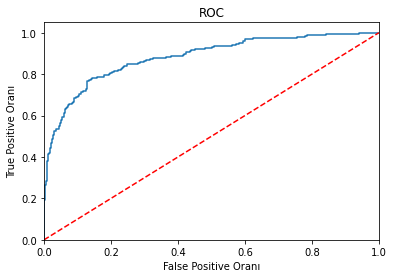

In [142]:
logit_roc_auc = roc_auc_score(y_data, classifier.predict(x_data))

fpr, tpr, thresholds = roc_curve(y_data, classifier.predict_proba(x_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1],"r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Oranı")
plt.title("ROC")
plt.show()

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [144]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(x_train,y_train)

In [145]:
cross_val_score(loj_model, x_test, y_test, cv = 10).mean()

0.8641269841269843

In [146]:
tuning_result(y_test, loj_model.predict(x_test))

accuracy = 0.8725212464589235
precision = 0.5806451612903226
recall = 0.36
f1 = 0.4444444444444445


### KNN

In [147]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)
y_prob = y_prob_2d[:, 1]

In [148]:
print("-" * 15)
print("res_clf")
for i in eval_clf(y_val, y_pred).items():
    print(f"{i}")


print("-" * 15)
print("res_auc")
for i in eval_auc(y_val, y_prob).items():
    print(f"{i}")

---------------
res_clf
('acc', 0.8248587570621468)
('p', 0.2857142857142857)
('r', 0.07142857142857142)
('f1', 0.1142857142857143)
---------------
res_auc
('roc_auc', 0.7346596356663471)
('pr_auc', 0.3296923952235754)


#### Model Tuning

In [149]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [150]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [151]:
print(f"En iyi skor: {str(knn_cv.best_score_)}")
print(f"En iyi parametreler: {str(knn_cv.best_params_)}")

En iyi skor: 0.8311049074346164
En iyi parametreler: {'n_neighbors': 22}


In [152]:
knn = KNeighborsClassifier(knn_cv.best_params_["n_neighbors"])
knn_tuned = knn.fit(x_train, y_train)

In [153]:
knn_tuned.score(x_test, y_test)

0.8583569405099151

In [154]:
y_pred = knn_tuned.predict(x_test)

In [155]:
tuning_result(y_test, y_pred)

accuracy = 0.8583569405099151
precision = 0.0
recall = 0.0
f1 = 0.0


### SVM

In [156]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

In [157]:
# Default kernel = rbf
classsifier = SVC(kernel="rbf", random_state=42, probability=True)
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [158]:
y_pred = classifier.predict(x_val_scaled)
y_prob_2d = classifier.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [159]:
print("-" * 15)
print("res_clf")
for i in eval_clf(y_val, y_pred).items():
    print(f"{i}")


print("-" * 15)
print("res_auc")
for i in eval_auc(y_val, y_prob).items():
    print(f"{i}")

---------------
res_clf
('acc', 0.8813559322033898)
('p', 0.7692307692307693)
('r', 0.35714285714285715)
('f1', 0.48780487804878053)
---------------
res_auc
('roc_auc', 0.8866251198465964)
('pr_auc', 0.7018992511130555)


#### Model Tuning

In [160]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "rbf")

svc_cv_model = GridSearchCV(svc,svc_params, cv = 10)

svc_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [161]:
print(f"En iyi parametreler: {str(svc_cv_model.best_params_)}")

En iyi parametreler: {'C': 1}


In [162]:
svc_tuned = SVC(kernel = "rbf", C = 1).fit(x_train, y_train)

In [163]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.8583569405099151

In [164]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

In [165]:
# Default kernel = rbf
classsifier = SVC(kernel="rbf", random_state=42, probability=True)
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [166]:
y_pred = classifier.predict(x_val_scaled)
y_prob_2d = classifier.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [167]:
print("-" * 15)
print("res_clf")
for i in eval_clf(y_val, y_pred).items():
    print(f"{i}")


print("-" * 15)
print("res_auc")
for i in eval_auc(y_val, y_prob).items():
    print(f"{i}")

---------------
res_clf
('acc', 0.8813559322033898)
('p', 0.7692307692307693)
('r', 0.35714285714285715)
('f1', 0.48780487804878053)
---------------
res_auc
('roc_auc', 0.8866251198465964)
('pr_auc', 0.7018992511130555)


#### Model Tuning

In [168]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "rbf")

svc_cv_model = GridSearchCV(svc,svc_params, cv = 10)

svc_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [169]:
print(f"En iyi parametreler: {str(svc_cv_model.best_params_)}")

En iyi parametreler: {'C': 1}


In [170]:
svc_tuned = SVC(kernel = "rbf", C = svc_cv_model.best_params_["C"]).fit(x_train, y_train)

In [171]:
y_pred = svc_tuned.predict(x_test)

In [172]:
tuning_result(y_test, y_pred)

accuracy = 0.8583569405099151
precision = 0.0
recall = 0.0
f1 = 0.0


### SVM (Sigmoid Kernel)

In [173]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

In [174]:
# Default kernel = rbf
classsifier = SVC(kernel="sigmoid", random_state=42, probability=True)
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [175]:
y_pred = classifier.predict(x_val_scaled)
y_prob_2d = classifier.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [176]:
print("-" * 15)
print("res_clf")
for i in eval_clf(y_val, y_pred).items():
    print(f"{i}")


print("-" * 15)
print("res_auc")
for i in eval_auc(y_val, y_prob).items():
    print(f"{i}")

---------------
res_clf
('acc', 0.8813559322033898)
('p', 0.7692307692307693)
('r', 0.35714285714285715)
('f1', 0.48780487804878053)
---------------
res_auc
('roc_auc', 0.8866251198465964)
('pr_auc', 0.7018992511130555)


#### Model Tuning

In [177]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "rbf")

svc_cv_sigmoid_model = GridSearchCV(svc,svc_params, cv = 10)

svc_cv_sigmoid_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [178]:
print(f"En iyi parametreler: {str(svc_cv_sigmoid_model.best_params_)}")

En iyi parametreler: {'C': 1}


In [179]:
svc_tuned_sigmoid = SVC(kernel = "sigmoid", C = svc_cv_sigmoid_model.best_params_["C"]).fit(x_train, y_train)

In [180]:
y_pred = svc_tuned_sigmoid.predict(x_test)

In [181]:
tuning_result(y_test, y_pred)

accuracy = 0.8498583569405099
precision = 0.36363636363636365
recall = 0.08
f1 = 0.13114754098360654


### Decision Tree

In [182]:
classifier = DecisionTreeClassifier(criterion= "entropy", random_state= 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [183]:
y_pred = classifier.predict(x_val)
y_prob_2d = classifier.predict_proba(x_val)
y_prob = y_prob_2d[:, 1]

In [184]:
print("-" * 15)
print("res_clf")
for i in eval_clf(y_val, y_pred).items():
    print(f"{i}")


print("-" * 15)
print("res_auc")
for i in eval_auc(y_val, y_prob).items():
    print(f"{i}")

---------------
res_clf
('acc', 0.9322033898305084)
('p', 0.7666666666666667)
('r', 0.8214285714285714)
('f1', 0.793103448275862)
---------------
res_auc
('roc_auc', 0.8872243528283795)
('pr_auc', 0.8081719128329298)


#### Model Tuning

In [185]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [186]:
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10)
cart_cv_model = cart_cv.fit(x_train, y_train)

In [187]:
print(f"En iyi parametreler: {str(cart_cv_model.best_params_)}")

En iyi parametreler: {'max_depth': 4, 'min_samples_split': 43}


In [188]:
dtree = DecisionTreeClassifier(max_depth = cart_cv_model.best_params_["max_depth"], 
                               min_samples_split = cart_cv_model.best_params_["min_samples_split"]
                              )
dtree_tuned = cart.fit(x_train, y_train)

In [189]:
y_pred = dtree_tuned.predict(x_test)

In [190]:
tuning_result(y_test, y_pred)

accuracy = 0.7960339943342776
precision = 0.31666666666666665
recall = 0.38
f1 = 0.34545454545454546


### Random Forests

**Information Gain (Enformasyon Kazanımı) ID3**

${\displaystyle Info(D) = -{\sum_{i=1}^m}p_i log_2(p_i)}$
<br><br>
${\displaystyle Info_A(D) = {\sum_{j=1}^v}{\frac {|D_j|}{|D|}}xI(D_j)}$
<br><br>
${\displaystyle Gain(A) = Info(D) - Info_A(D)}$

In [191]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

In [192]:
classifier = RandomForestClassifier(n_estimators= 300, criterion= "entropy", random_state= 0)
classifier.fit(x_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [193]:
y_pred = classifier.predict(x_val_scaled)
y_prob_2d = classifier.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [194]:
print("-" * 15)
print("res_clf")
for i in eval_clf(y_val, y_pred).items():
    print(f"{i}")


print("-" * 15)
print("res_auc")
res_auc = eval_auc(y_val, y_prob)
print(res_auc)

---------------
res_clf
('acc', 0.943502824858757)
('p', 0.9090909090909091)
('r', 0.7142857142857143)
('f1', 0.8)
---------------
res_auc
{'roc_auc': 0.9669223394055608, 'pr_auc': 0.9153682690931043}


#### Model Tuning

In [195]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "min_samples_split": [2,5,10]}

In [196]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10) 

In [197]:
rf_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10]})

In [198]:
print(f"En iyi parametreler: {str(rf_cv_model.best_params_)}")

En iyi parametreler: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 5}


In [199]:
rf_tuned = RandomForestClassifier(max_depth = rf_cv_model.best_params_["max_depth"], 
                                  max_features = rf_cv_model.best_params_["max_features"], 
                                  min_samples_split = rf_cv_model.best_params_["min_samples_split"])

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=5)

In [200]:
y_pred = rf_tuned.predict(x_test)

In [201]:
tuning_result(y_test, y_pred)

accuracy = 0.8611898016997167
precision = 0.5555555555555556
recall = 0.1
f1 = 0.16949152542372883


### GBM

In [202]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

In [203]:
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=4, random_state=0)
classifier.fit(x_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, random_state=0)

In [204]:
y_pred = classifier.predict(x_val_scaled)
y_prob_2d = classifier.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [205]:
print("-" * 15)
print("res_clf")
for i in eval_clf(y_val, y_pred).items():
    print(f"{i}")

print("-" * 15)
print("res_auc")
for i in eval_auc(y_val, y_prob).items():
    print(f"{i}")

---------------
res_clf
('acc', 0.9491525423728814)
('p', 0.8275862068965517)
('r', 0.8571428571428571)
('f1', 0.8421052631578947)
---------------
res_auc
('roc_auc', 0.9614093959731543)
('pr_auc', 0.9173679989183577)


#### Model Tuning

In [206]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [207]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10)

In [208]:
gbm_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [209]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5}


In [210]:
gbm = GradientBoostingClassifier(learning_rate = gbm_cv.best_params_["learning_rate"], 
                                 max_depth = gbm_cv.best_params_["max_depth"],
                                 min_samples_split = gbm_cv.best_params_["min_samples_split"])

In [211]:
gbm_tuned =  gbm.fit(x_train,y_train)

In [212]:
y_pred = gbm_tuned.predict(x_test)

In [213]:
tuning_result(y_test, y_pred)

accuracy = 0.8753541076487252
precision = 0.6153846153846154
recall = 0.32
f1 = 0.4210526315789474


#### Save

In [214]:
with open("Pickles//standard_scaler.pkl", "wb") as f:
    pickle.dump(sc,f)

### LightGBM

In [215]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_val_scaled = sc.transform(x_val)

In [216]:
classifier = LGBMClassifier(n_estimators=100, learning_rate=1.0, max_depth=4, random_state=0)
classifier.fit(x_train_scaled, y_train)

LGBMClassifier(learning_rate=1.0, max_depth=4, random_state=0)

In [217]:
x_train_scaled.shape

(823, 51)

In [218]:
y_pred = classifier.predict(x_val_scaled)
y_prob_2d = classifier.predict_proba(x_val_scaled)
y_prob = y_prob_2d[:, 1]

In [219]:
print("-" * 15)
print("res_clf")
for i in eval_clf(y_val, y_pred).items():
    print(f"{i}")

print("-" * 15)
print("res_auc")
for i in eval_auc(y_val, y_prob).items():
    print(f"{i}")

---------------
res_clf
('acc', 0.9322033898305084)
('p', 0.7666666666666667)
('r', 0.8214285714285714)
('f1', 0.793103448275862)
---------------
res_auc
('roc_auc', 0.9448705656759349)
('pr_auc', 0.7736615530905313)


#### Model Tuning

In [220]:
lgbm_params = {
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [221]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 10)



In [222]:
lgbm_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'subsample': [0.6, 0.8, 1.0]})

In [223]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_samples': 20,
 'subsample': 0.6}

In [224]:
lgbm = LGBMClassifier(learning_rate = lgbm_cv_model.best_params_["learning_rate"], 
                       max_depth = lgbm_cv_model.best_params_["max_depth"],
                       min_child_samples = lgbm_cv_model.best_params_["min_child_samples"],
                       subsample = lgbm_cv_model.best_params_["subsample"],
                       )

In [225]:
lgbm_tuned = lgbm.fit(x_train,y_train)

In [226]:
y_pred = lgbm_tuned.predict(x_test)

In [227]:
tuning_result(y_test, y_pred)

accuracy = 0.8696883852691218
precision = 0.5909090909090909
recall = 0.26
f1 = 0.36111111111111116


## Tüm Modellerin Karşılaştırılması

### Accuracy

---------------
LogisticRegression:
Accuracy: %87.2521
---------------
KNeighborsClassifier:
Accuracy: %85.8357
---------------
SVC:
Accuracy: %85.8357
---------------
SVC:
Accuracy: %84.9858
---------------
DecisionTreeClassifier:
Accuracy: %79.6034
---------------
RandomForestClassifier:
Accuracy: %86.119
---------------
GradientBoostingClassifier:
Accuracy: %87.5354
---------------
LGBMClassifier:
Accuracy: %86.9688
---------------


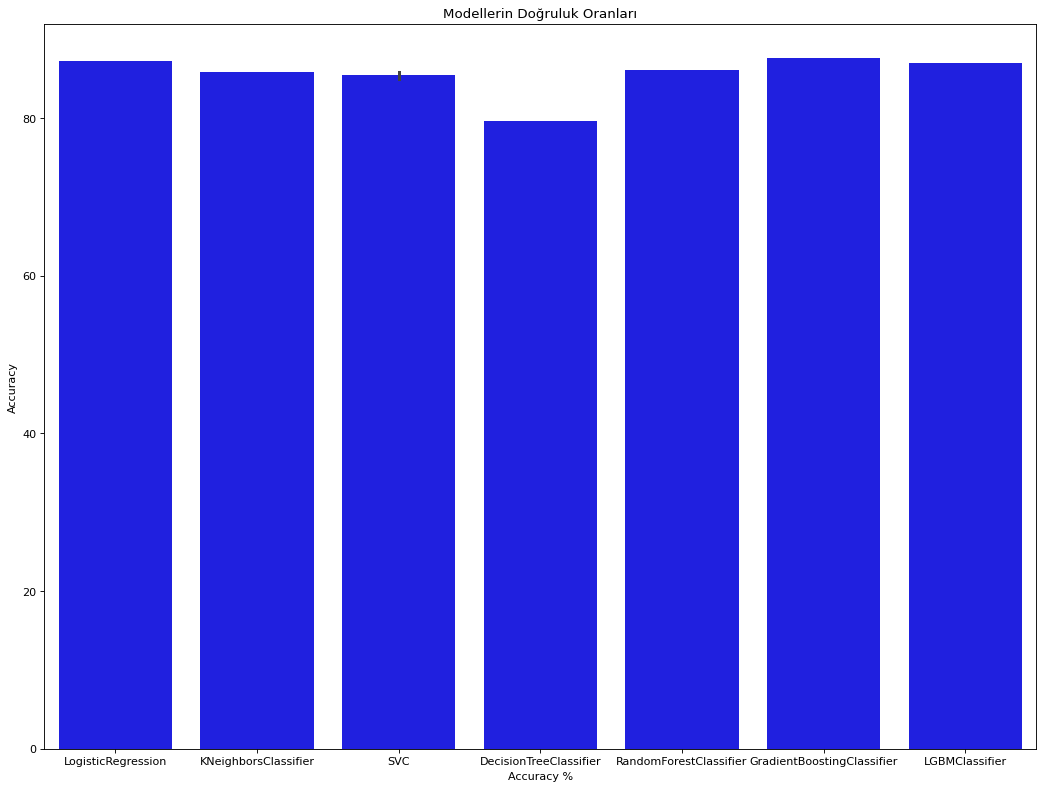

In [228]:
modeller = [
    loj_model,
    knn_tuned,
    svc_tuned,
    svc_tuned_sigmoid,
    dtree_tuned,
    rf_tuned,
    gbm_tuned,
    lgbm_tuned,
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*15)
    print(isimler + ":" )
    print(f"Accuracy: %{round(dogruluk*100,4)}")
print("-"*15)
    
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
  
plt.figure(figsize=(16, 12), dpi=80)
sns.barplot(y = "Accuracy", x = "Modeller", data=sonuclar, color="b")
plt.xlabel("Accuracy %")
plt.title("Modellerin Doğruluk Oranları");


### F1 Score

---------------
LogisticRegression:
F1: %44.4444
---------------
KNeighborsClassifier:
F1: %0.0
---------------
SVC:
F1: %0.0
---------------
SVC:
F1: %13.1148
---------------
DecisionTreeClassifier:
F1: %34.5455
---------------
RandomForestClassifier:
F1: %16.9492
---------------
GradientBoostingClassifier:
F1: %42.1053
---------------
LGBMClassifier:
F1: %36.1111
---------------


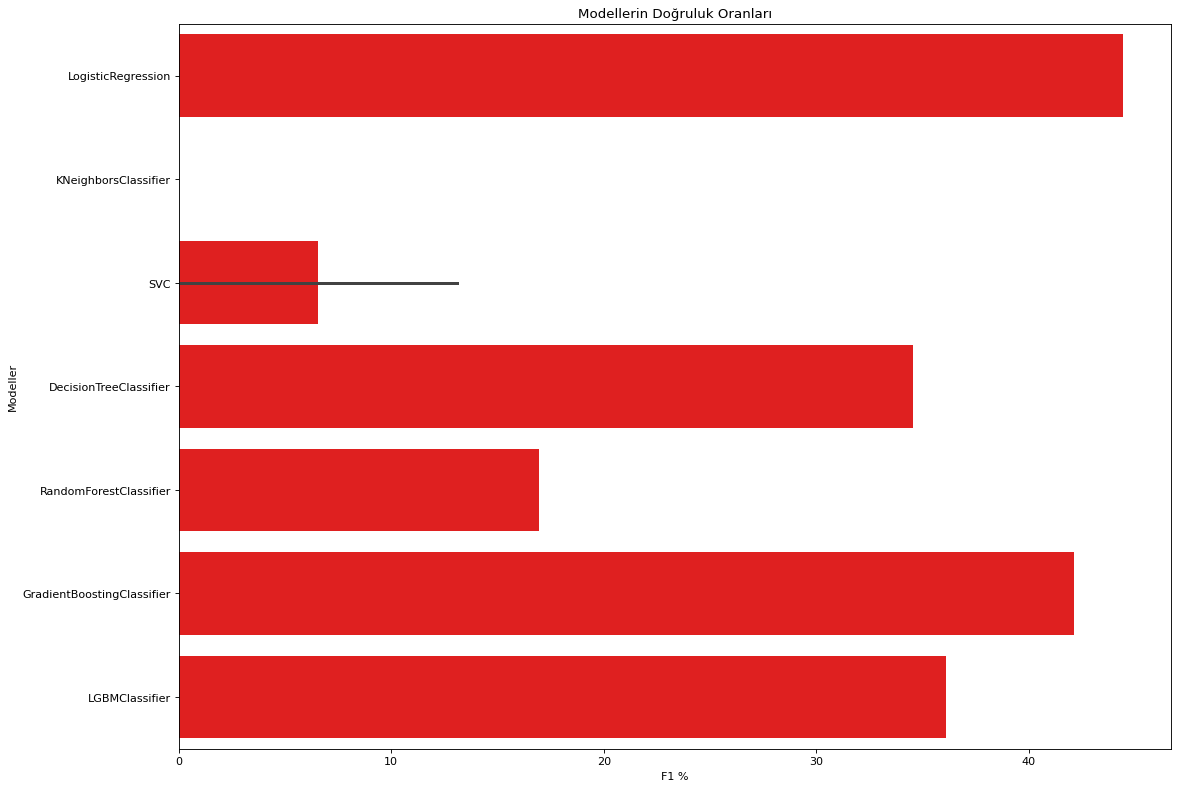

In [229]:
modeller = [
    loj_model,
    knn_tuned,
    svc_tuned,
    svc_tuned_sigmoid,
    dtree_tuned,
    rf_tuned,
    gbm_tuned,
    lgbm_tuned,
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = f1_score(y_test, y_pred)
    print("-"*15)
    print(isimler + ":" )
    print(f"F1: %{round(dogruluk*100,4)}")
print("-"*15)
    
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","F1"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    dogruluk = f1_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","F1"])
    sonuclar = sonuclar.append(sonuc)
    
  
plt.figure(figsize=(16, 12), dpi=80)
sns.barplot(x= "F1", y = "Modeller", data=sonuclar, color="r")
plt.xlabel("F1 %")
plt.title("Modellerin Doğruluk Oranları");

## Save İşlemi

In [230]:
for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(x_test)
    with open ("Pickles//" + isimler + ".pkl", "wb") as f:
        pickle.dump(model, f)

# 

Template Hazırlanmasında Yardımcı Kaynak: https://www.kaggle.com/startupsci/titanic-data-science-solutions